This notebook tracks the covariance of cells across sessions.  One module saves all cells so that you can easily look at any comparison across successive days, but I also save freeze tuned cells only and the top cells from the 1st 3 PCs for ease.

In [1]:
# Import useful modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.gridspec as gridspec
import pandas as pd
from tqdm import tqdm

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

from session_directory import find_eraser_directory as get_dir
import er_plot_functions as erp
import Placefields as pf
import freezing_analysis as fa
import helpers 
import eraser_reference as err

# Project save directory here
print_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
save_dir = '/Users/nkinsky/Documents/BU/Working/Eraser'

In [2]:
# Helper functions to block printing output
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__


In [ ]:
# Plot 1st PC across days for each mouse.
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']

for group, name in zip(group_plot, group_names):
    for mouse in group:
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(1, 6, figsize=(16, 2.5))
        fig.suptitle(name + ' ' + mouse + ': PCA #0: Top wt cells (> 2SD) across days')
        for ida, (d1, d2, a) in enumerate(zip(day1, day2, ax)):
            cbar_bool = ida == 0
            try:
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                sig_pc0 = np.where(DRreg.DRbase.pca.df[0].abs() > DRreg.DRbase.pca.df[0].std()*2)[0]
                DRreg.plot_cov_across_days(neurons=sig_pc0, label='PC #0', ax=a, cbar=cbar_bool)

                # Clean up plots
                a.set_title('')
            except FileNotFoundError:
                a.text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                a.text(0.1, 0.5, 'ValueError - check out session')

No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
Calculating Dupret activations from raw calcium activity
No tunings found for this session - run .get_tuning_sig() and .save_sig_tuning()
Calculating Dupret activations from raw calcium activity


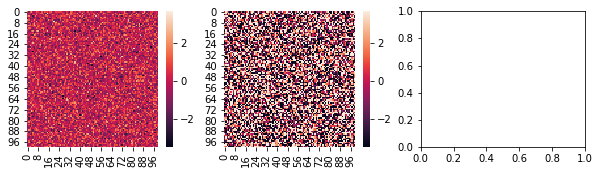

In [3]:
import matplotlib

def get_quadmesh(ax):
    """Grab QuadMesh children of a particular axes only"""
    quad_ind = np.where([isinstance(child, matplotlib.collections.QuadMesh) 
                 for child in ax.get_children()])[0][0]
        
    return ax.get_children()[quad_ind]

def set_clim(ax, ida):
    """Sets clim to for all plots in ax to that in ax[ida]"""
    quad_use = get_quadmesh(ax[ida])
    clim_use = quad_use.get_clim()
    for a in ax.reshape(-1):
        try:
            quad_set = get_quadmesh(a)
            quad_set.set_clim(clim_use)
        except IndexError:
            pass
        
# Unit test for above
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax2 = plt.subplots(1, 3, figsize=(10, 2.5))
sns.heatmap(np.random.randn(100, 100), ax=ax2[0])
sns.heatmap(np.random.randn(100,100)*5, ax=ax2[1])
set_clim(ax2, 0)

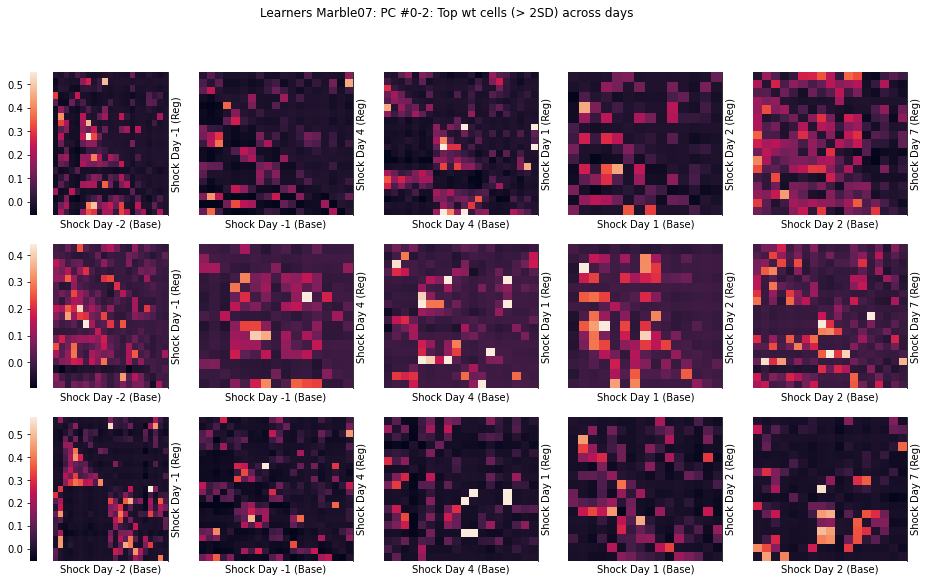

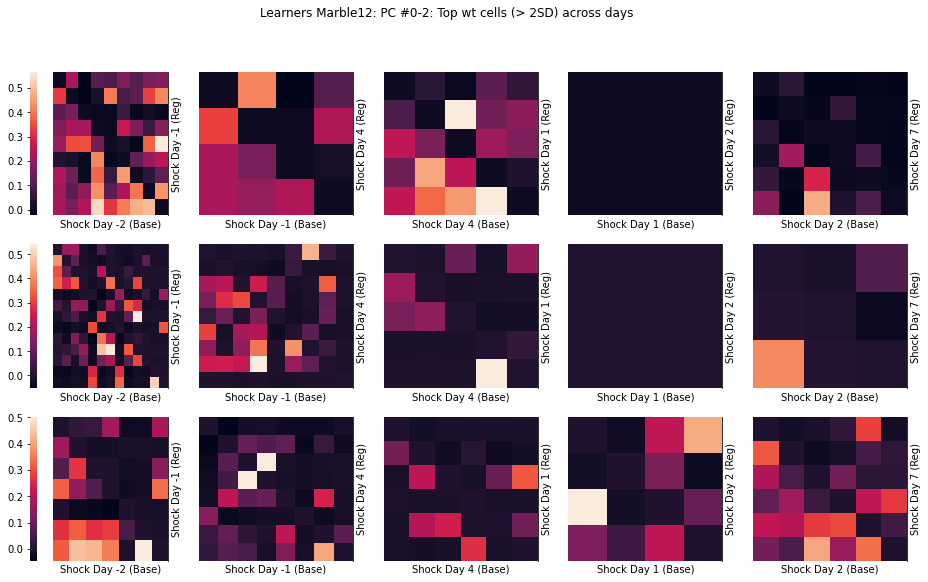

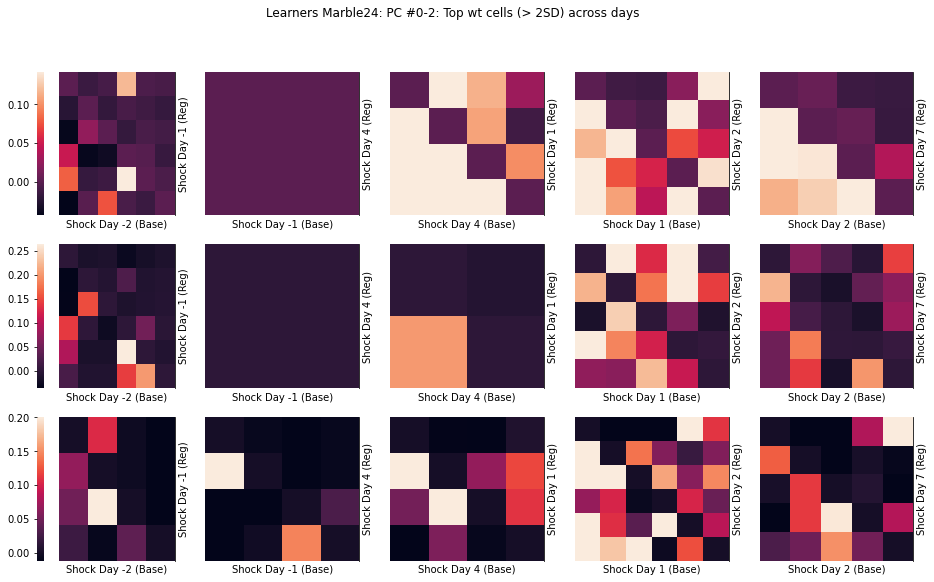

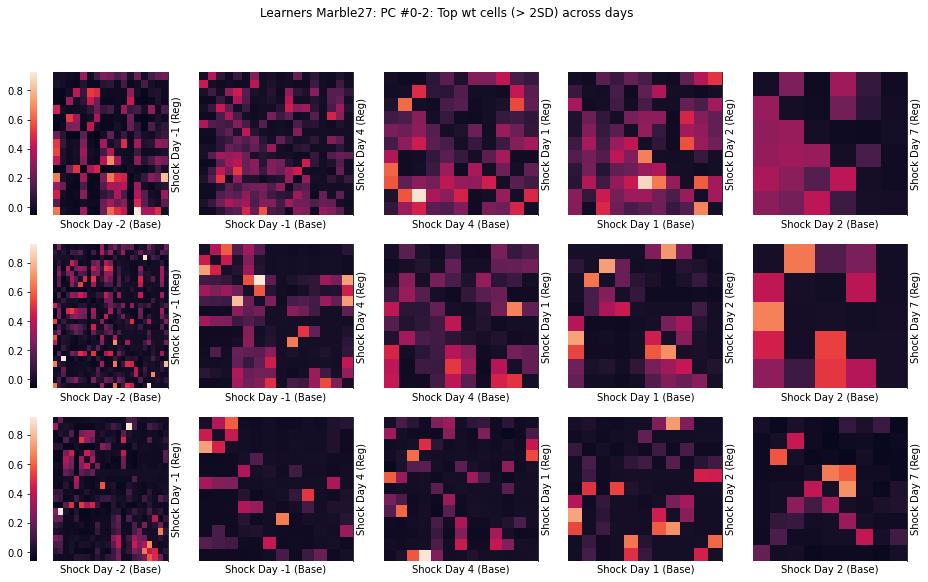

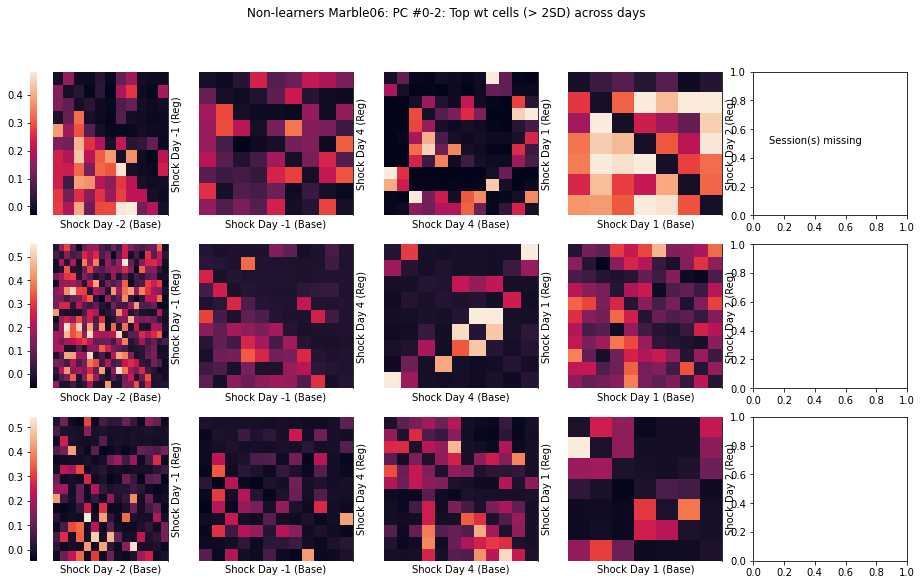

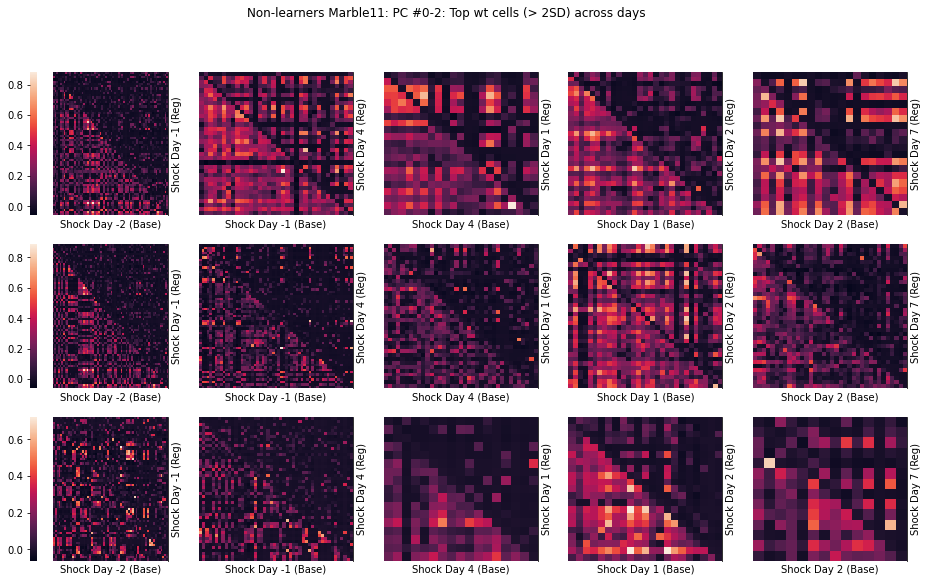

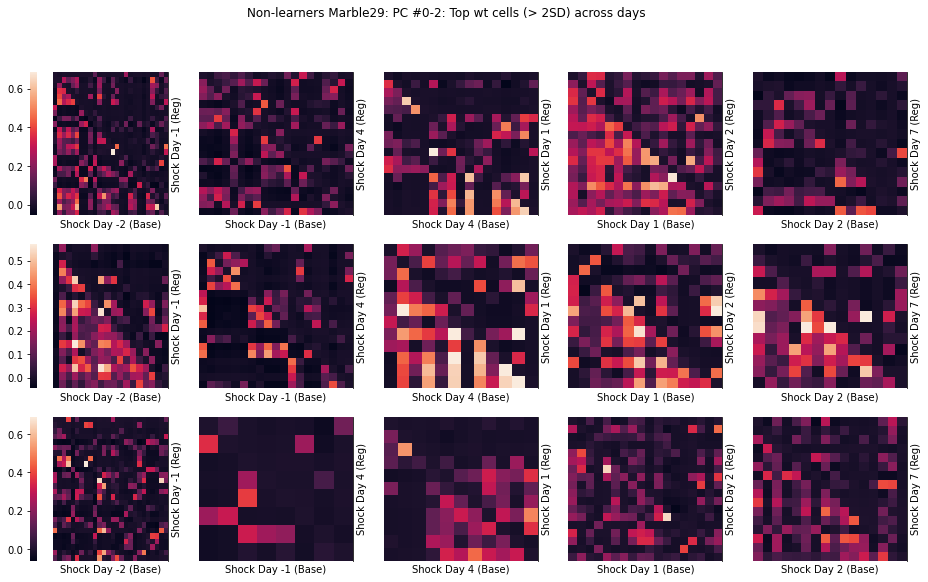

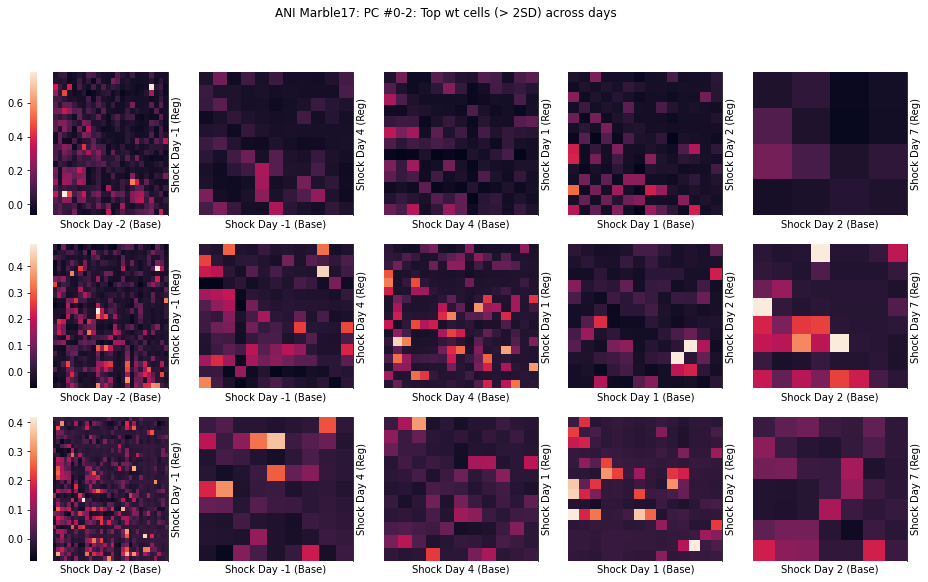

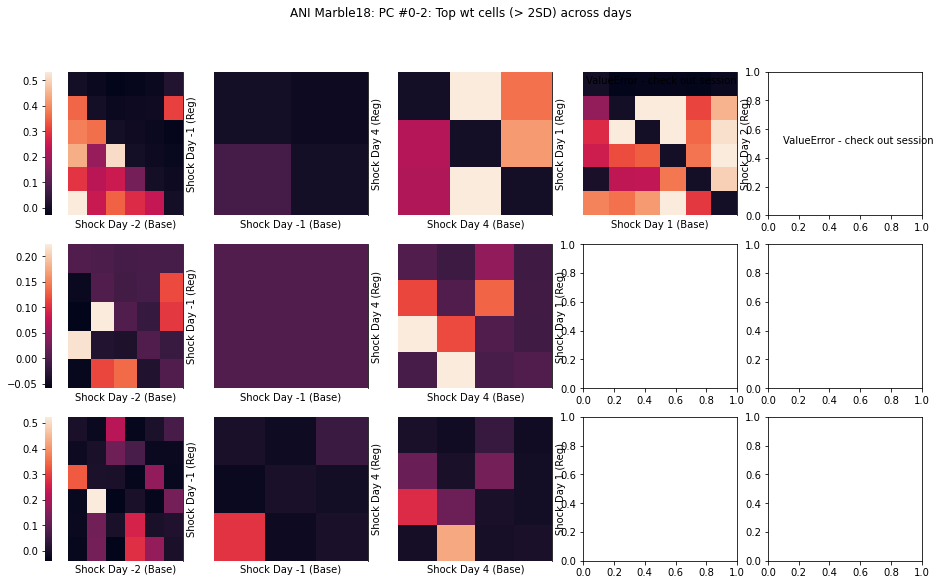

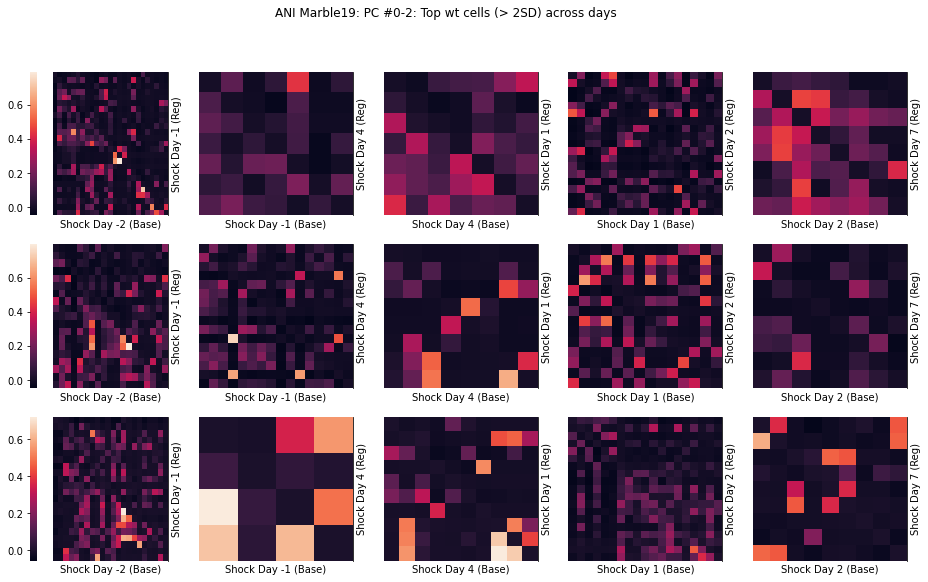

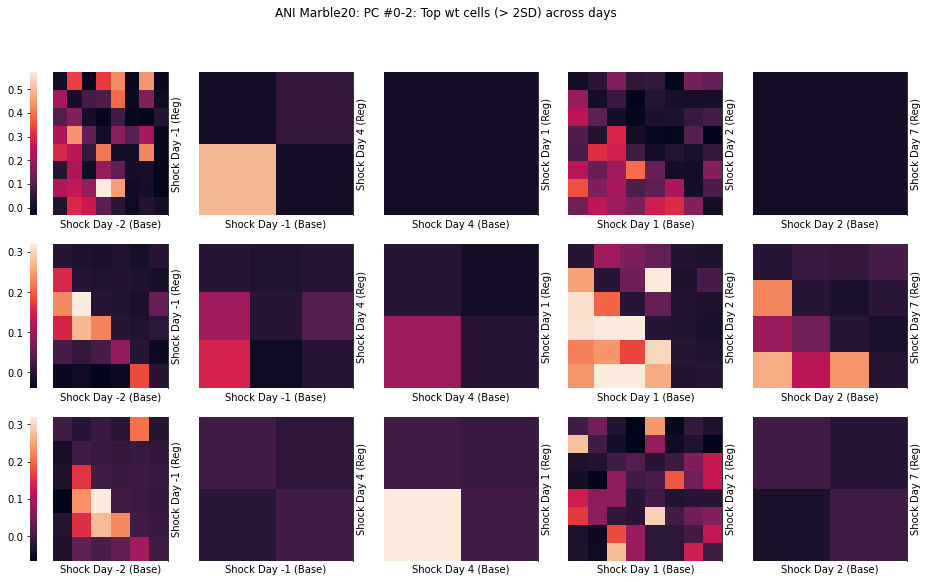

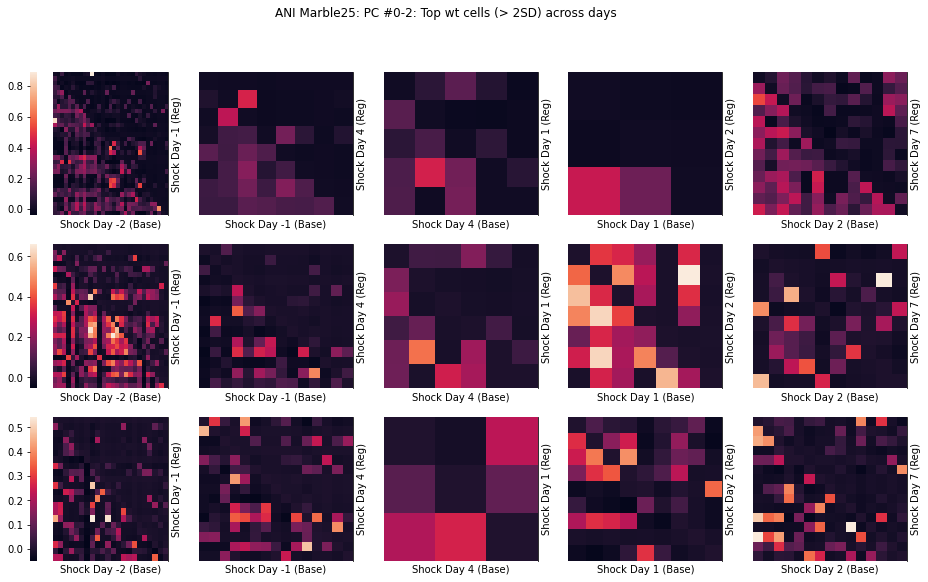

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Plot 1st 3 PCs across days for each mouse.
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
nPCs = 3 # #pcs to plot

blockPrint()

for group, name in zip(group_plot, group_names):
    for mouse in group:
        day1 = [-2, -1, 4, 1, 2]
        day2 = [-1, 4, 1, 2, 7]
        fig, ax = plt.subplots(nPCs, 5, figsize=(16, 3*nPCs))
        fig.suptitle(name + ' ' + mouse + ': PC #0-' + str(nPCs-1) + ': Top wt cells (> 2SD) across days')
        for ida, (d1, d2) in enumerate(zip(day1, day2)):
            cbar_bool = ida == 0
            try:
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                for pc in tqdm(range(nPCs), desc=f'{mouse} PC #{ida}:')::
                    sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                    DRreg.plot_cov_across_days(neurons=sig_wts, label='PC #0', ax=ax[pc, ida], cbar=cbar_bool)

                    # Clean up plots
                    ax[pc, ida].set_title('')
            except FileNotFoundError:
                ax[0, ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[0, ida].text(0.1, 0.5, 'ValueError - check out session')
        
        # Normalize all cbars to 1st plot in each row.
        for arow in ax:
            set_clim(arow, 0)

enablePrint()


# Big question: Are our Learner v Nonlearner groupings appropriate?  Marble29 seems to have a lot of consistency in freezing cells across days - maybe he freezes a lot and just doesn't discriminate between arenas?

ANI: 100%|███████████████████████████████████████████| 5/5 [18:57<00:00, 227.43s/it]


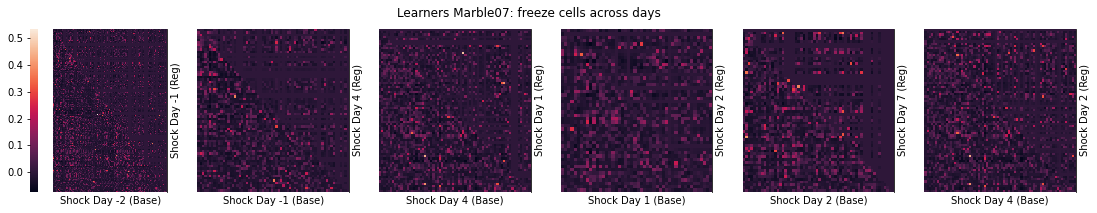

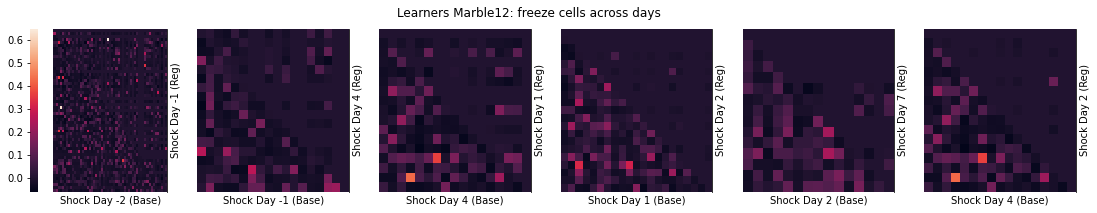

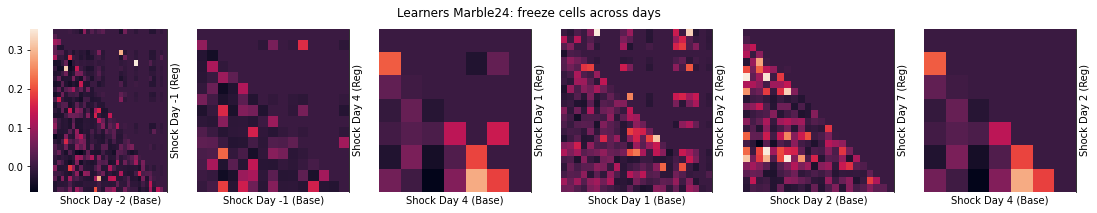

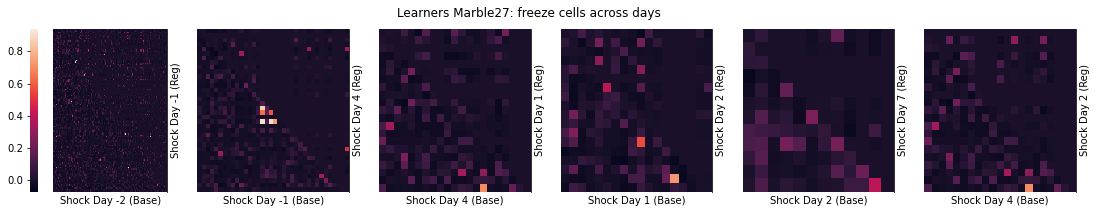

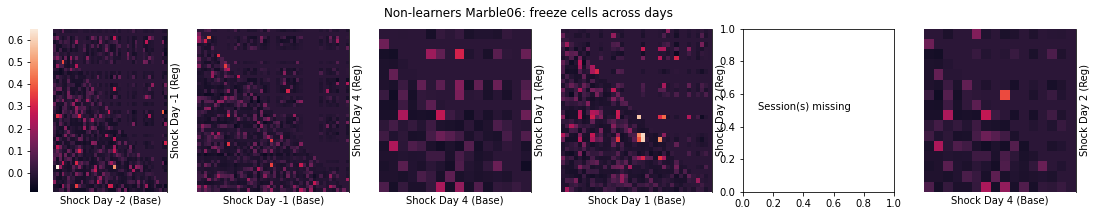

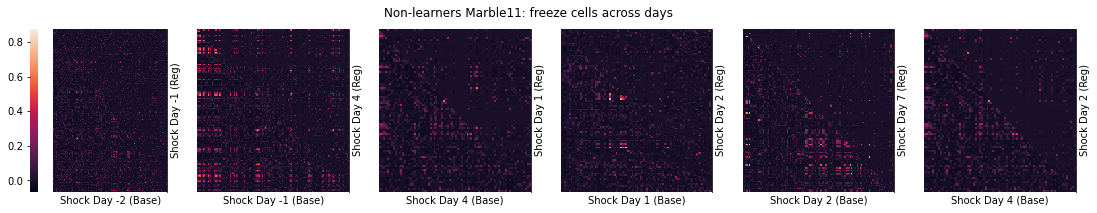

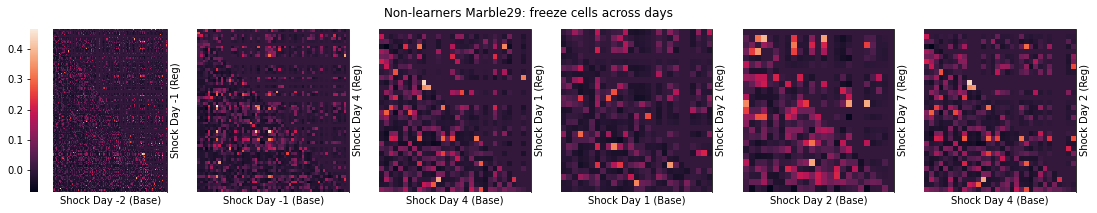

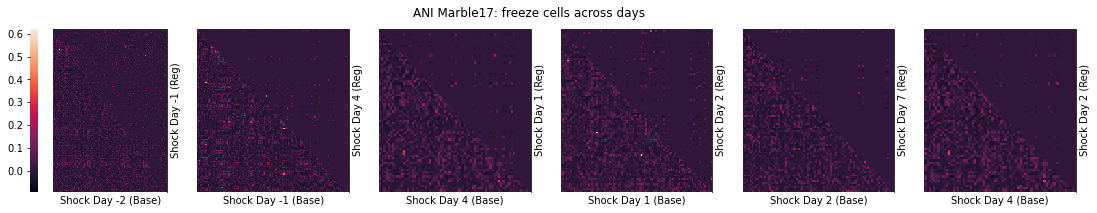

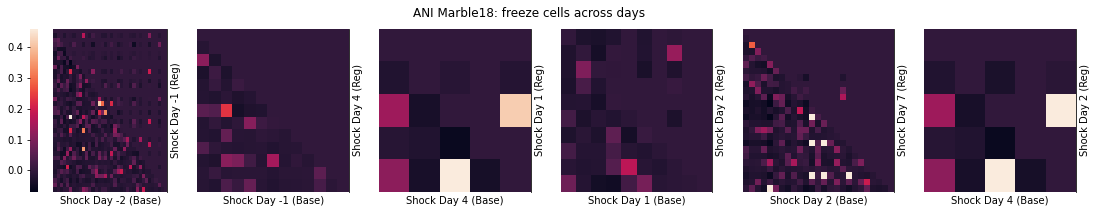

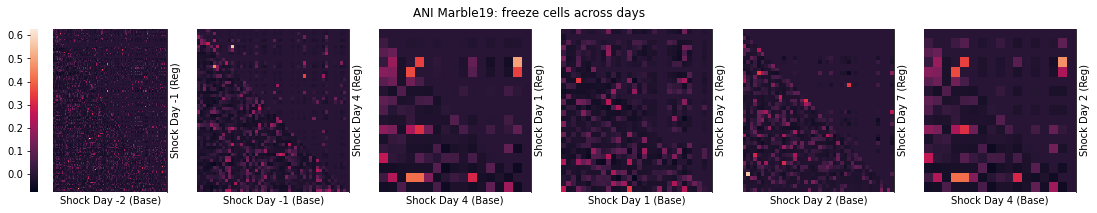

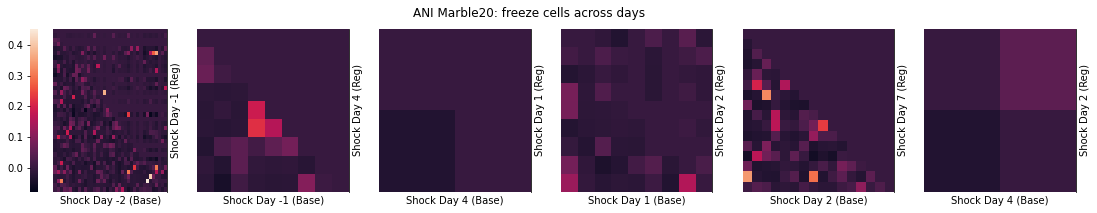

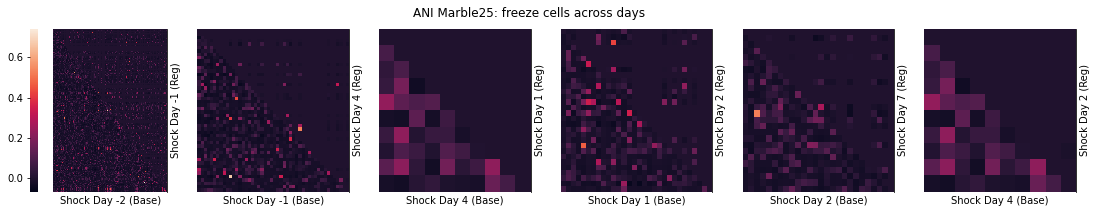

(-0.14175942163947164, 0.7286632591134349)
(0.0, 1.0)
(-0.14175942163947164, 0.7286632591134349)
(0.0, 1.0)
0.04069239979636857
0.08138479959273714
0.08138479959273714
0.08472982718077303
0.12201537164867979
0.10599939209498918
0.08472982718077303
0.08472982718077303


In [4]:
# Plot freeze cells across days for each mouse with silent cells
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
# nPCs = 3 # #pcs to plot

cov_dict = dict.fromkeys(group_names)
for group, name in zip(group_plot, group_names):
    cov_dict[name] = dict.fromkeys(group)
    for mouse in tqdm(group, desc=name):
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(1, 6, figsize=(19, 3*1))
        fig.suptitle(name + ' ' + mouse + ': freeze cells across days')
        cov_dict[name][mouse] = {}
        for ida, (d1, d2) in enumerate(zip(day1, day2)):
            cbar_bool = ida == 0
#             cov_dict[name][mouse] = {f'{d1}_{d2}' : []}
            try:
                blockPrint()
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                enablePrint()
                    
#                     sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                _, covz_comb = DRreg.plot_cov_across_days(neurons='freeze_onset', label='PC #0', ax=ax[ida], cbar=cbar_bool,
                                          keep_silent=True)

                cov_dict[name][mouse][f'{d1}_{d2}'] = covz_comb
                    
                # Clean up plots
                ax[ida].set_title('')
            except FileNotFoundError:
                ax[ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[ida].text(0.1, 0.5, 'ValueError - check out session')
                
        # Normalize all cbars to 1st plot in each row.
#         for arow in ax:
            set_clim(ax, 0)

np.save(os.path.join(save_dir, 'freeze_cells_cov_across_days_w_silent.npy'), cov_dict, allow_pickle=True)
freeze_silent_cov_dict = cov_dict.copy()

ANI: 100%|███████████████████████████████████████████| 5/5 [17:09<00:00, 205.80s/it]


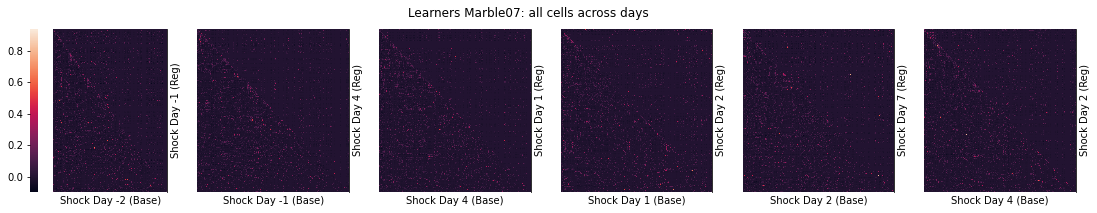

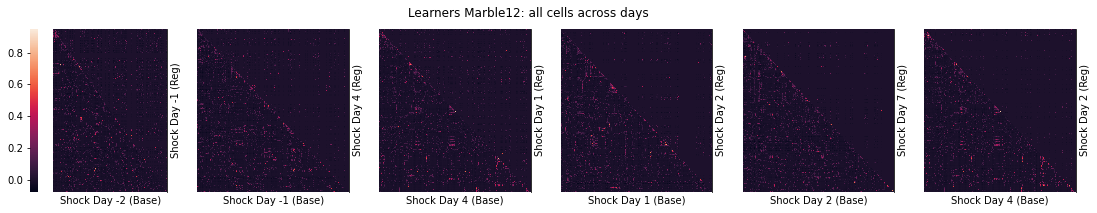

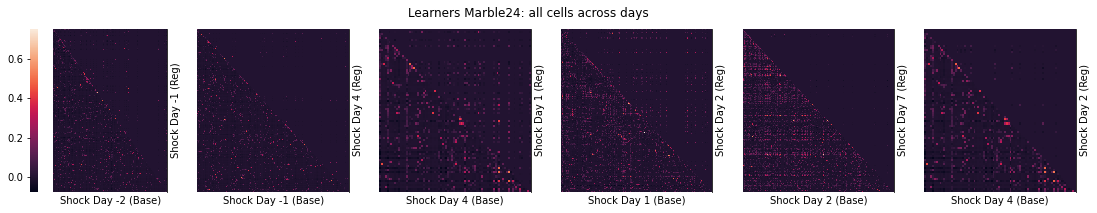

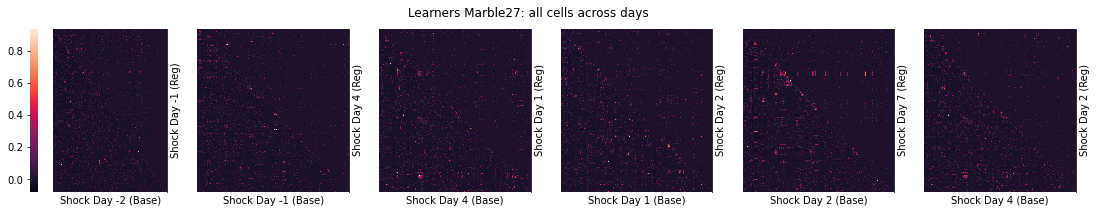

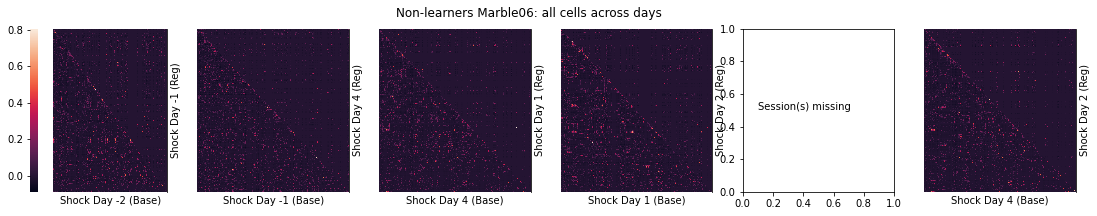

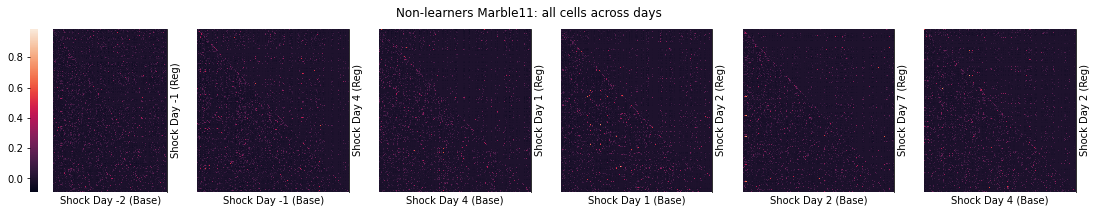

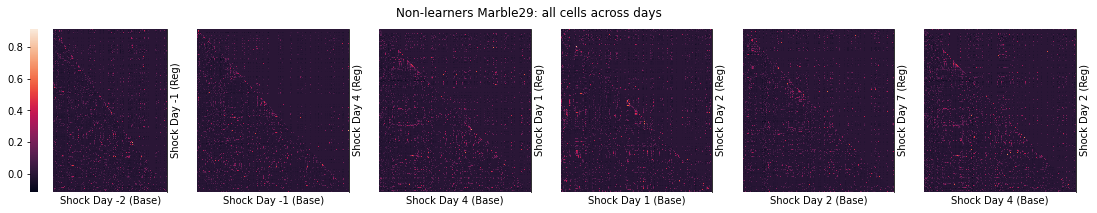

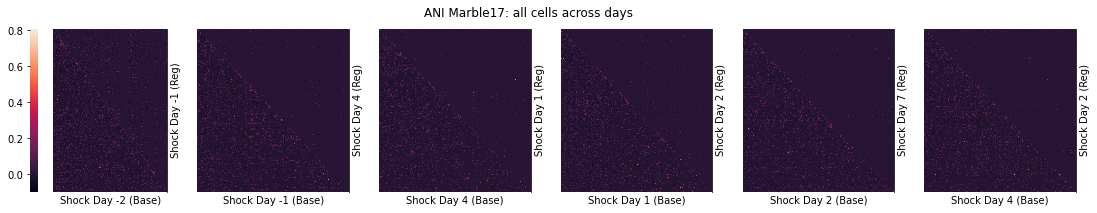

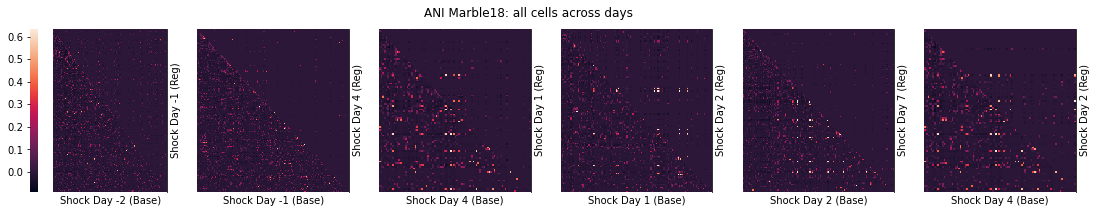

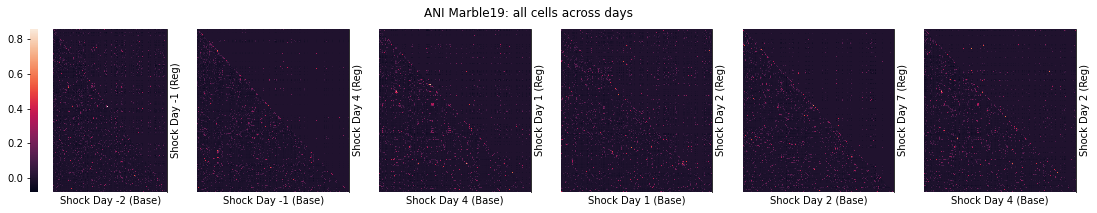

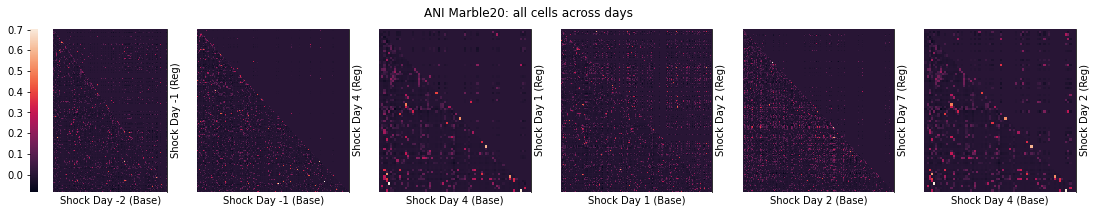

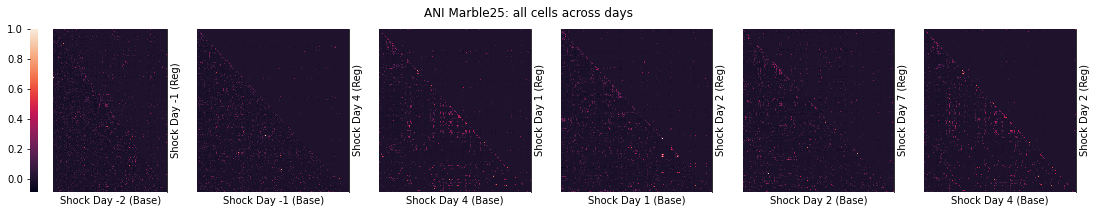

In [5]:
# Plot all cells across days for each mouse with silent cells
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
nPCs = 3 # #pcs to plot

cov_dict = dict.fromkeys(group_names)
for group, name in zip(group_plot, group_names):
    cov_dict[name] = dict.fromkeys(group)
    for mouse in tqdm(group, desc=name):
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(1, 6, figsize=(19, 3*1))
        fig.suptitle(name + ' ' + mouse + ': all cells across days')
        cov_dict[name][mouse] = {}
        for ida, (d1, d2) in enumerate(zip(day1, day2)):
            cbar_bool = ida == 0
#             cov_dict[name][mouse][f'{d1}_{d2}'] = []
            try:
                blockPrint()
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                enablePrint()
#                 for pc in range(nPCs):
                    
#                     sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                _, covz_comb = DRreg.plot_cov_across_days(neurons='all', label='PC #0', ax=ax[ida], 
                                                         cbar=cbar_bool, keep_silent=True)

                cov_dict[name][mouse][f'{d1}_{d2}'] = covz_comb
                    
                    # Clean up plots
                ax[ida].set_title('')
            except FileNotFoundError:
                ax[ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[ida].text(0.1, 0.5, 'ValueError - check out session')
                
        # Normalize all cbars to 1st plot in each row.
#         for arow in ax:
        set_clim(ax, 0)
    
np.save(os.path.join(save_dir, 'all_cells_cov_across_days.npy'), cov_dict, allow_pickle=True)
all_cov_dict = cov_dict.copy()


mouse: 6it [04:08, 41.40s/it]
mouse: 6it [01:20, 13.41s/it]
mouse: 6it [01:54, 19.11s/it]
mouse: 6it [02:26, 24.38s/it]
mouse: 6it [02:37, 26.27s/it]
mouse: 6it [34:15, 342.57s/it]
mouse: 6it [04:41, 46.91s/it]
mouse: 6it [15:29, 154.99s/it]
mouse: 6it [00:37,  6.17s/it]
mouse: 6it [03:33, 35.59s/it]
mouse: 6it [00:32,  5.49s/it]
mouse: 6it [06:05, 60.96s/it] 


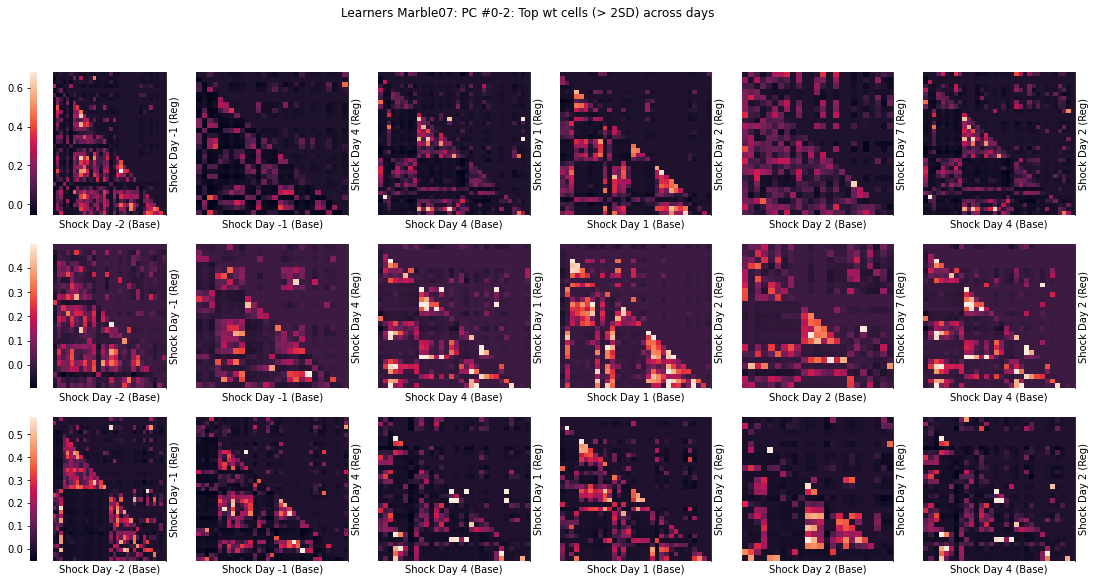

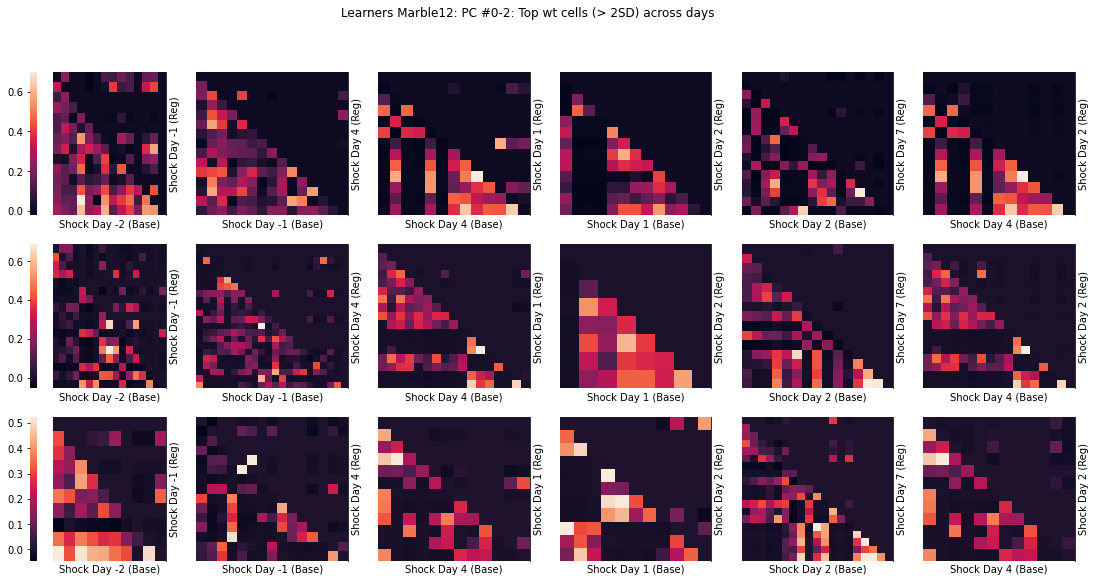

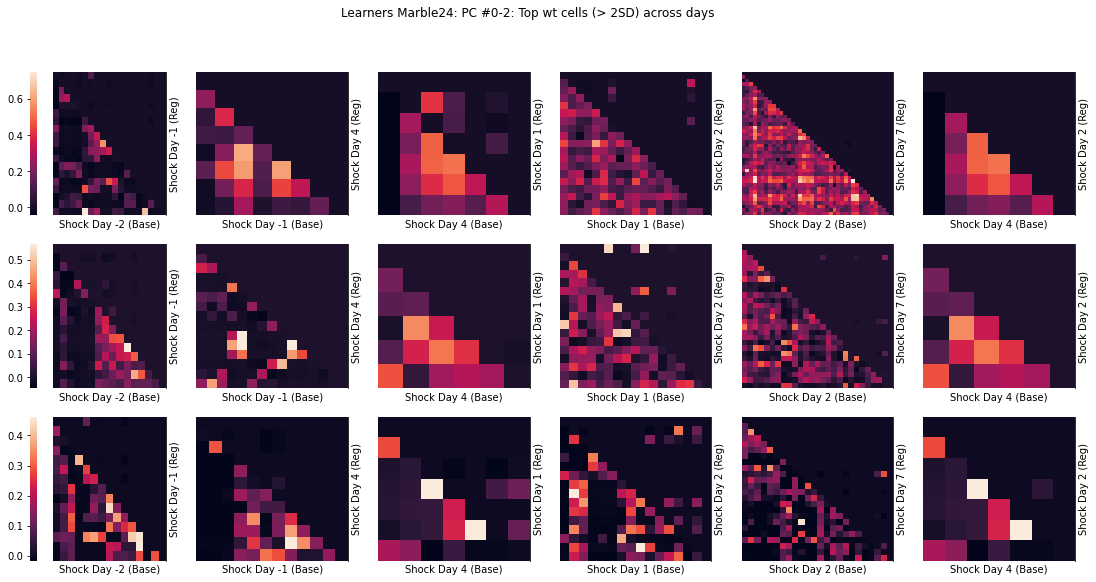

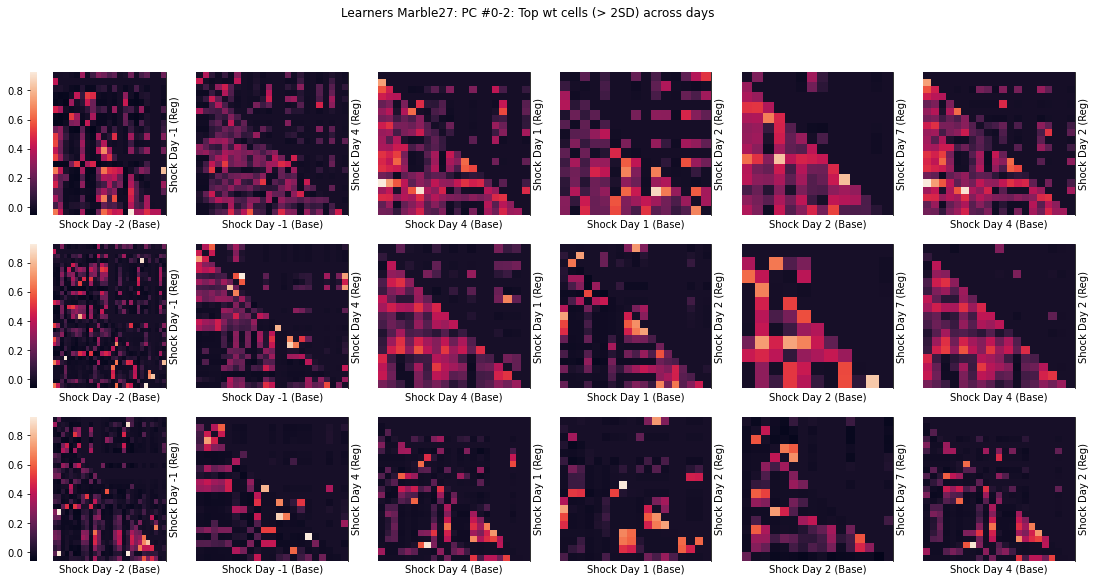

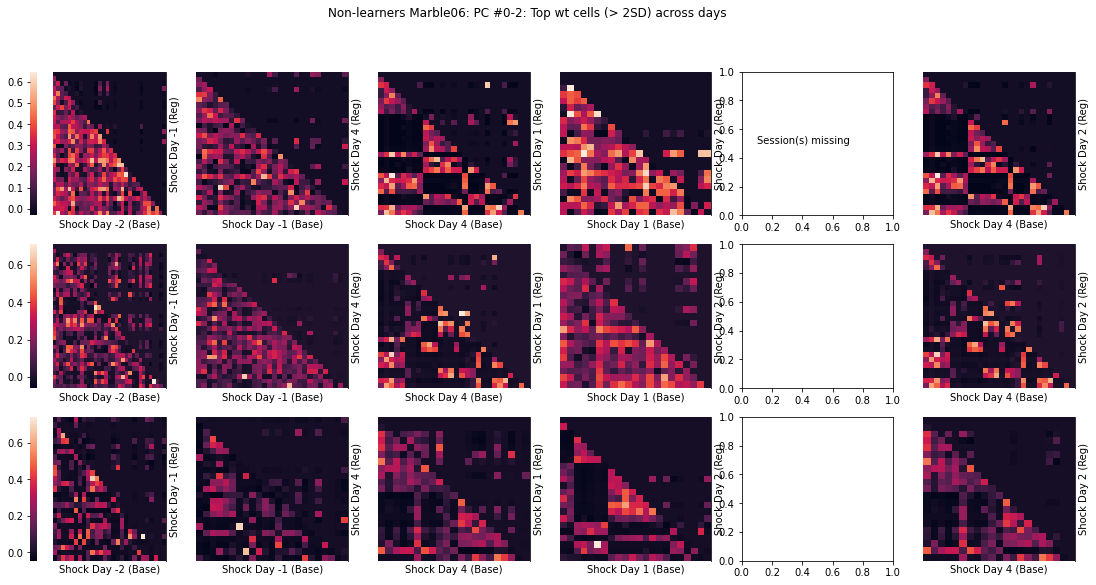

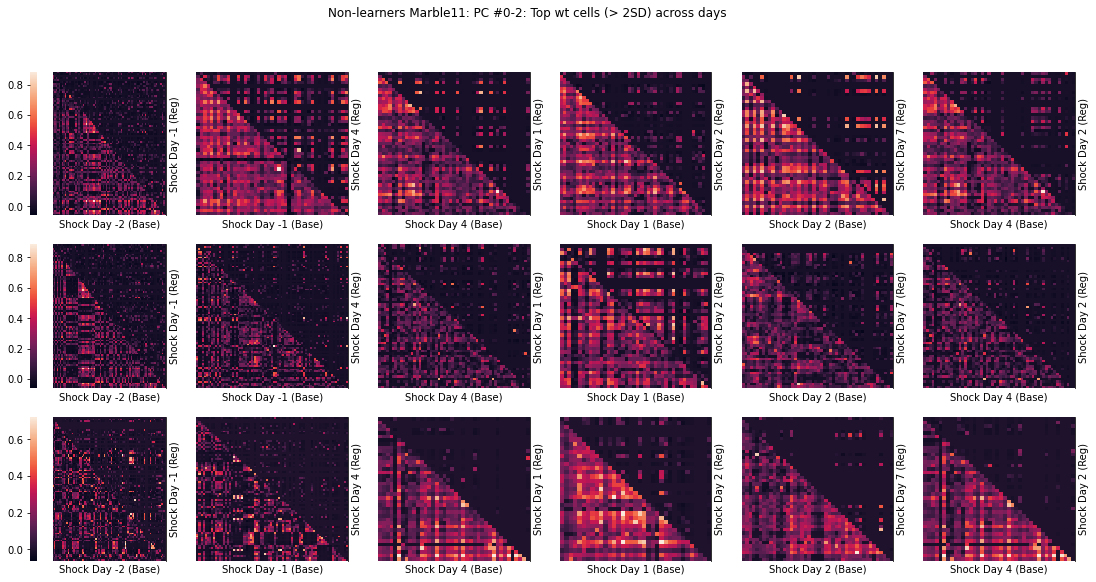

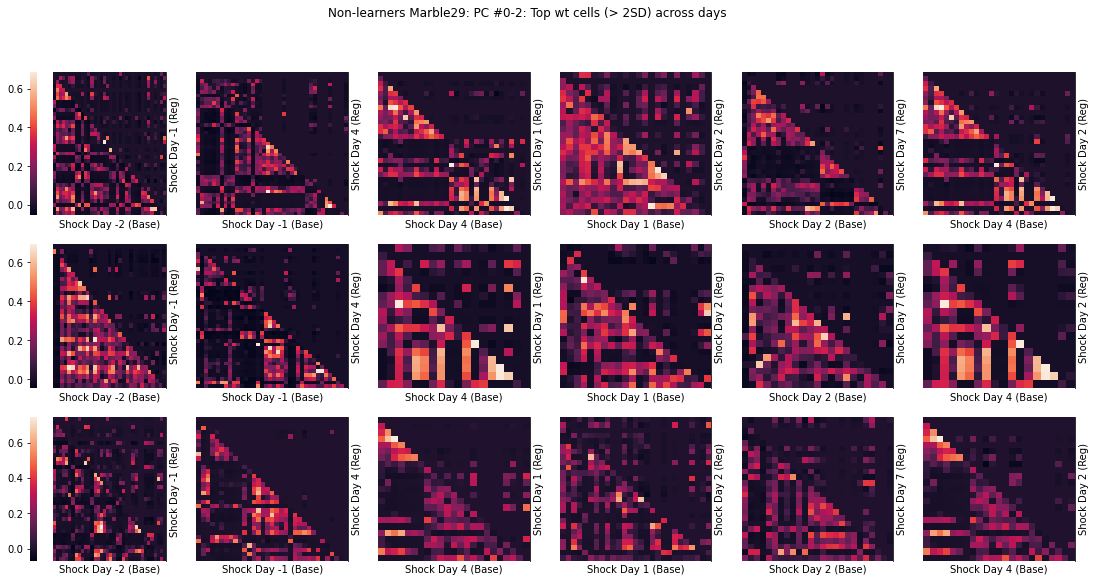

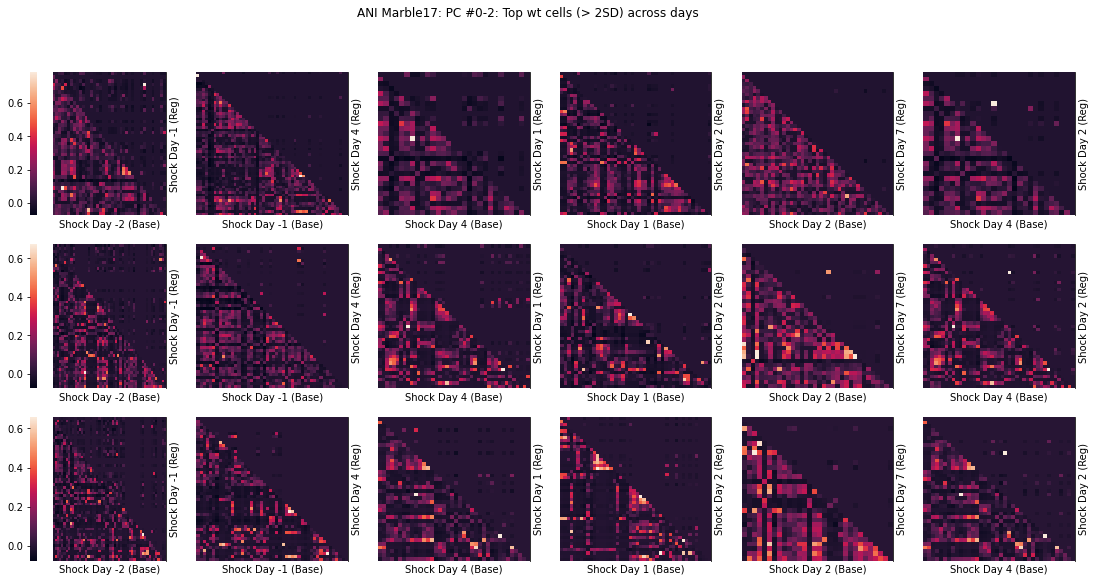

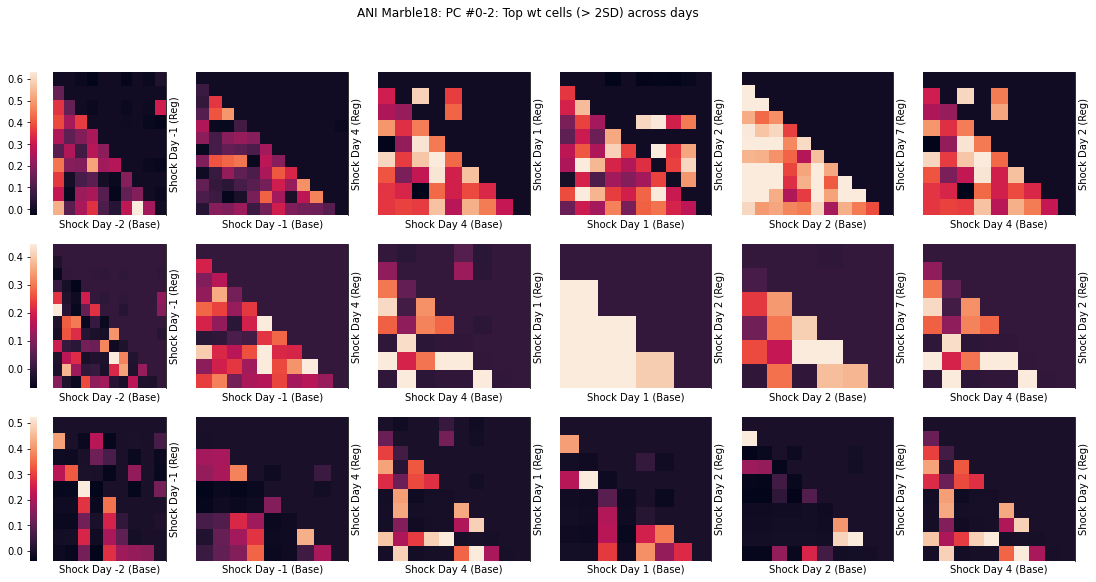

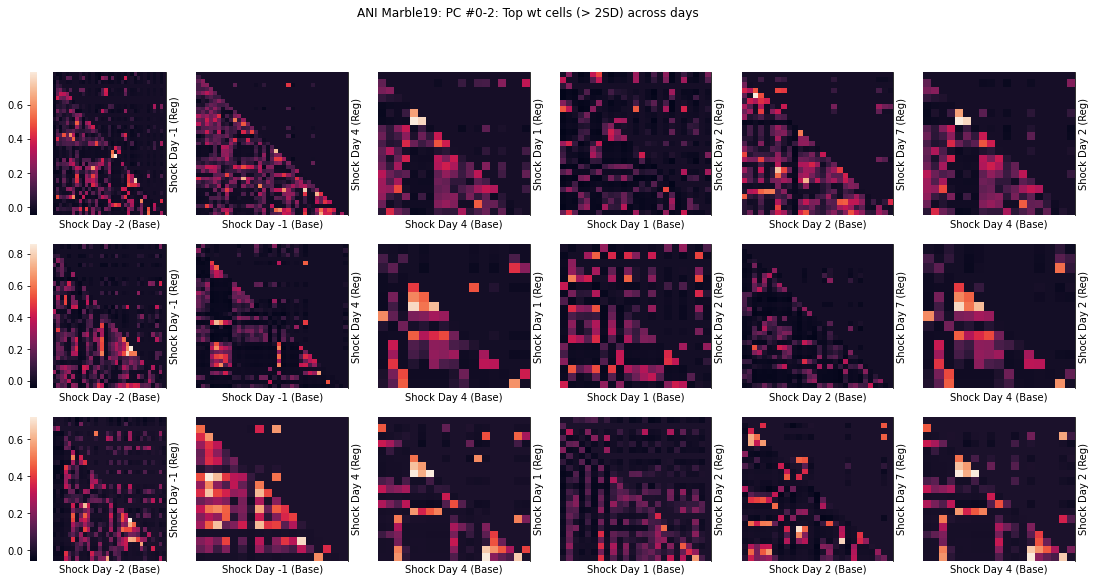

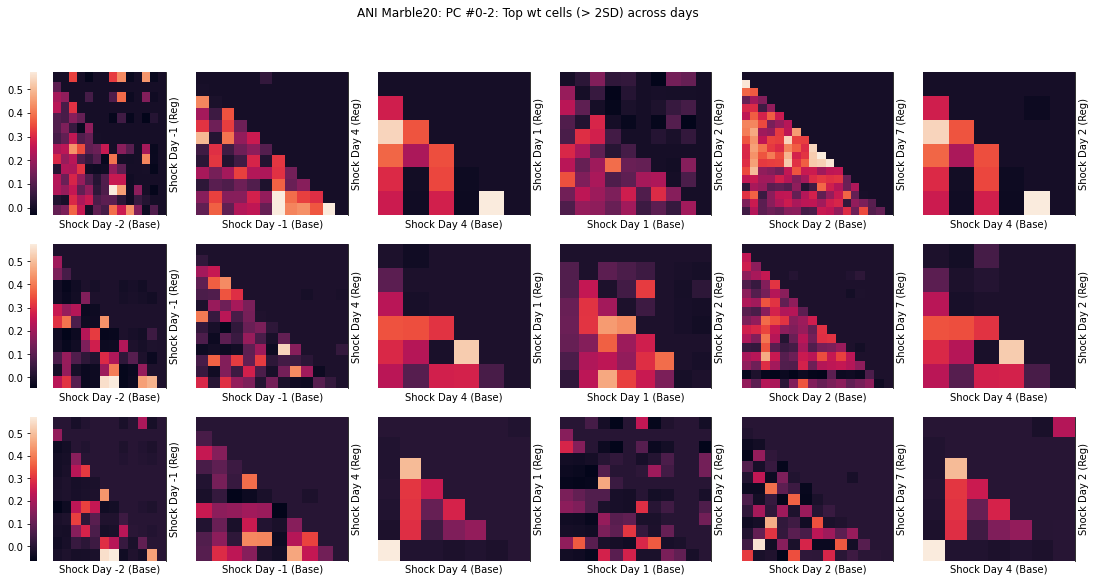

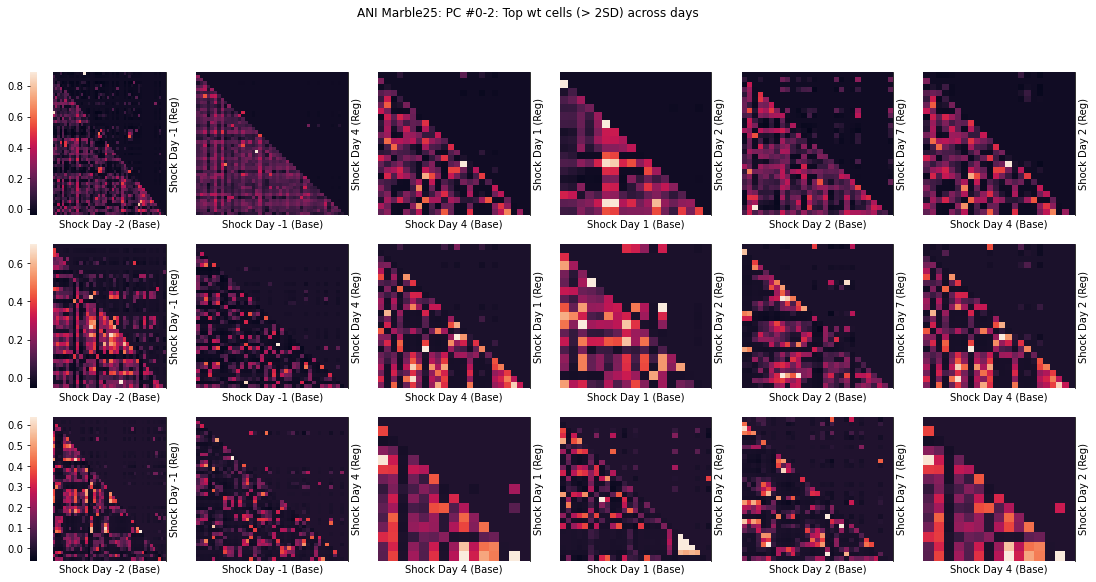

In [14]:
# Plot 1st 3 PCs across days for each mouse with silent cells - High wt cells only
import eraser_reference as err
import os
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
nPCs = 3 # #pcs to plot

cov_dict = dict.fromkeys(group_names)
for group, name in zip(group_plot, group_names):
    cov_dict[name] = dict.fromkeys(group)
    for mouse in group:
        day1 = [-2, -1, 4, 1, 2, 4]
        day2 = [-1, 4, 1, 2, 7, 2]
        fig, ax = plt.subplots(nPCs, 6, figsize=(19, 3*nPCs))
        fig.suptitle(name + ' ' + mouse + ': PC #0-' + str(nPCs-1) + ': Top wt cells (> 2SD) across days')
        cov_dict[name][mouse] = {}
        for ida, (d1, d2) in tqdm(enumerate(zip(day1, day2)), desc='mouse'):
            cbar_bool = ida == 0
            cov_dict[name][mouse][f'{d1}_{d2}'] = []
            try:
                blockPrint()
                DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
                enablePrint()
                for pc in range(nPCs):
                    
                    sig_wts = np.where(DRreg.DRbase.pca.df[pc].abs() > DRreg.DRbase.pca.df[pc].std()*2)[0]
                    _, covz_comb = DRreg.plot_cov_across_days(neurons=sig_wts, label='PC #0', ax=ax[pc, ida], cbar=cbar_bool,
                                              keep_silent=True)
                    
                    cov_dict[name][mouse][f'{d1}_{d2}'].append(covz_comb)
                    
                    # Clean up plots
                    ax[pc, ida].set_title('')
            except FileNotFoundError:
                ax[0, ida].text(0.1, 0.5, 'Session(s) missing') 
            except ValueError:
                ax[0, ida].text(0.1, 0.5, 'ValueError - check out session')
                
        # Normalize all cbars to 1st plot in each row.
        for arow in ax:
            set_clim(arow, 0)

np.save(os.path.join(save_dir, 'pca_cov_across_days.npy'), cov_dict, allow_pickle=True)
pca_cov_dict = cov_dict.copy()

## Now start analyzing the cov data

To start, plot covariance of all cells from one day to the next - do they fire together or do they change? May need to only look at tightly coupled cells

In [33]:
def plot_pw_cov_across_days(dict_use, ndays, include_silent, **kwargs):
    """Plots pairwise covariance across days"""
    for group_name in dict_use.keys():
        group_dict = dict_use[group_name]
        for mouse_name in group_dict.keys():
            mouse_dict = group_dict[mouse_name]
        #         ndays = len(mouse_dict.keys())
            fig, ax = plt.subplots(1, ndays, figsize=(3*ndays, 2.5))
            for idd, d1_d2 in enumerate(mouse_dict.keys()):
                cov_mat = mouse_dict[d1_d2]
                day1, day2 = d1_d2.split('_')
                fa.scatter_cov_across_days(cov_mat, include_silent=include_silent, xlabel=f'Day {day1}', 
                                           ylabel=f'Day {day2}', ax=ax[idd], **kwargs)
            fig.suptitle(mouse_name)

In [48]:
def get_cov_pairs_across_days(dict_use, include_silent):
    pairs_dict = dict.fromkeys(dict_use.keys())
    for group_name in dict_use.keys():
        group_dict = dict_use[group_name]
        pairs_dict[group_name] = dict.fromkeys(group_dict.keys())
        for mouse_name in group_dict.keys():
            mouse_dict = group_dict[mouse_name]
            pairs_dict[group_name][mouse_name] = dict.fromkeys(mouse_dict.keys())
            for idd, d1_d2 in enumerate(mouse_dict.keys()):
                cov_mat = mouse_dict[d1_d2]
                cov_pairs = fa.scatter_cov_across_days(cov_mat, include_silent=include_silent, plot=False)
                pairs_dict[group_name][mouse_name][d1_d2] = cov_pairs
    
    return pairs_dict

In [49]:
cov_pairs = get_cov_pairs_across_days(cov_dict_full, False)

In [91]:
np.std(H.reshape(-1))

13.46872746546699

<AxesSubplot:>

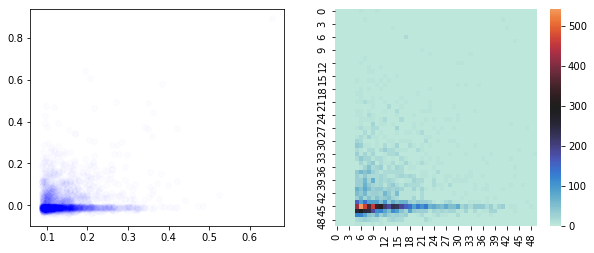

In [115]:
pairs_use = cov_pairs['Learners']['Marble07']['-1_4']
thresh = 2 * np.std(pairs_use[0])
pairs_use = pairs_use[:, pairs_use[0] > thresh]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(pairs_use[0], pairs_use[1], color=[0, 0, 1, 0.01])

range_use = np.vstack((ax[0].get_xlim(), ax[0].get_ylim()))
range_use = [[0.05, 0.4], [-0.05, 0.4]]
H, xedges, yedges = np.histogram2d(pairs_use[0], pairs_use[1], range=range_use, bins=50, density=True)
# ax[1].imshow(np.flipud(H))
sns.heatmap(np.flipud(H.T), center = 10 * np.std(H.reshape(-1)))

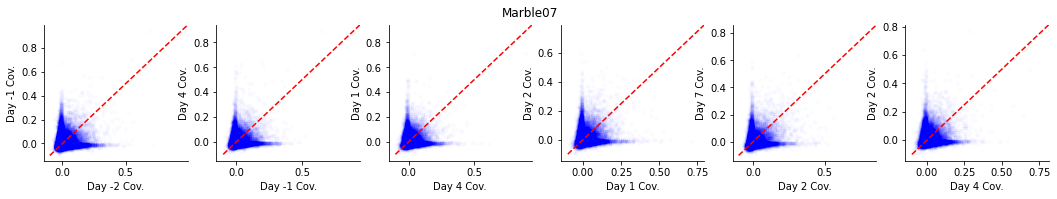

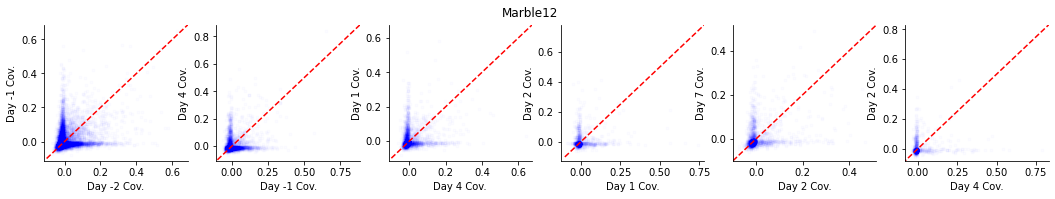

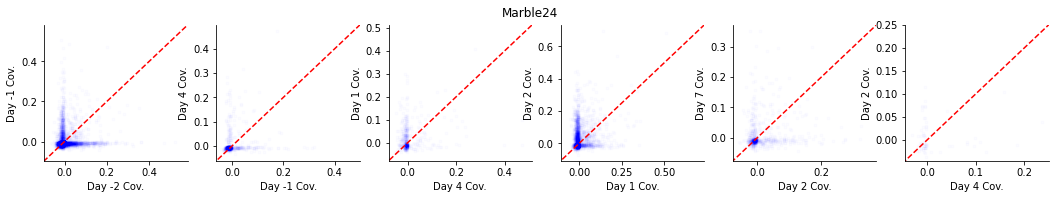

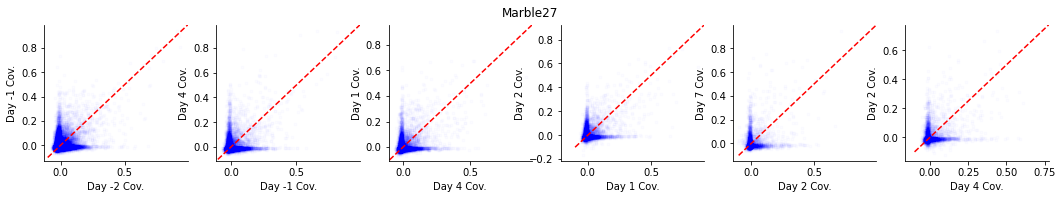

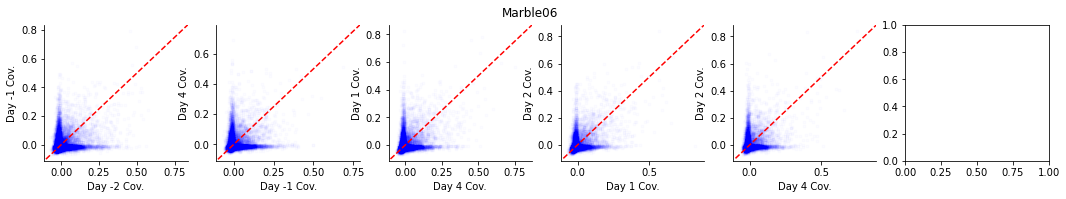

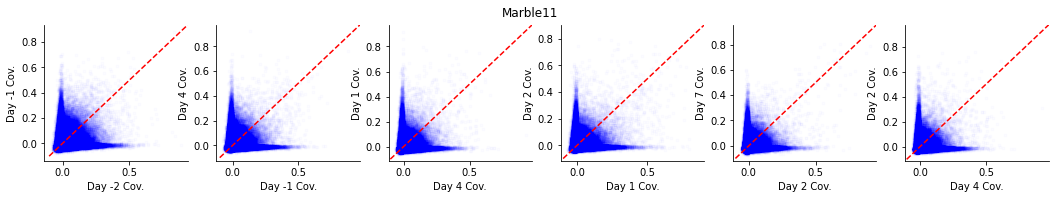

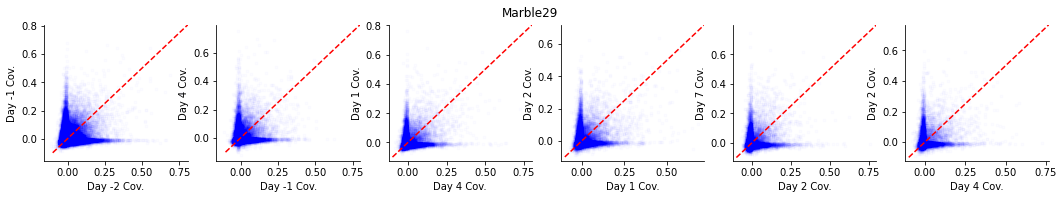

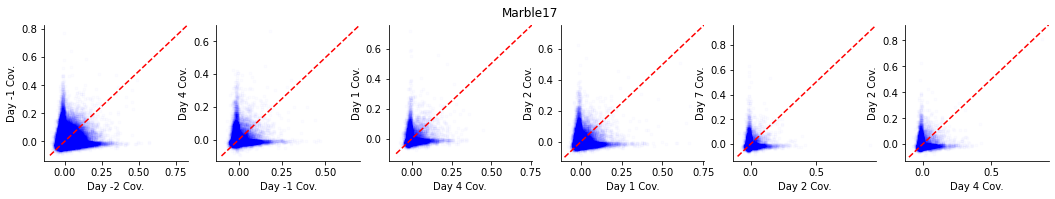

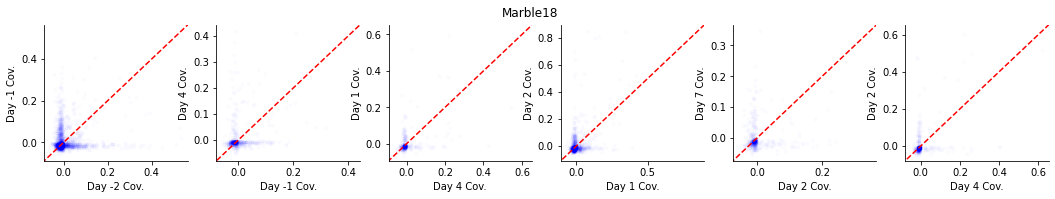

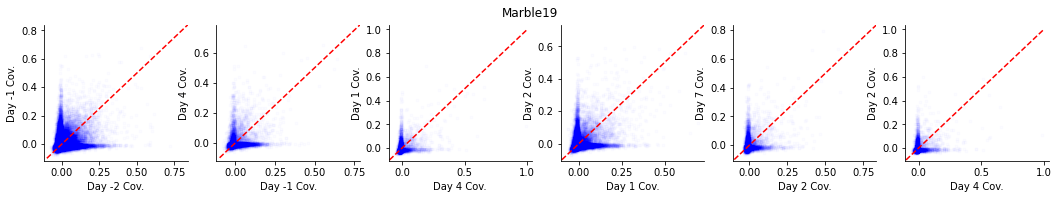

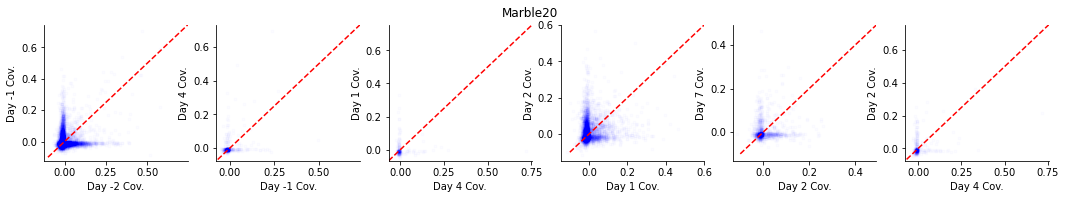

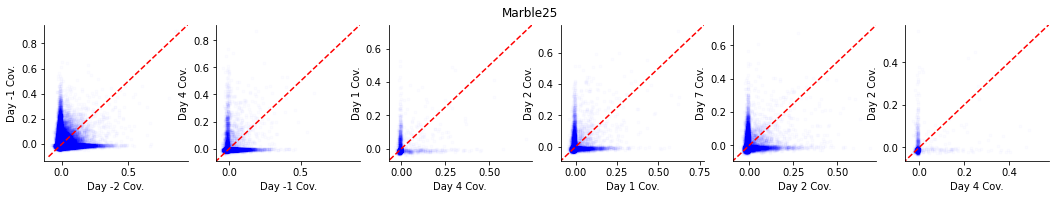

In [36]:
cov_dict_full = np.load(os.path.join(save_dir, 'all_cells_cov_across_days.npy'), allow_pickle=True).item()
plot_pw_cov_across_days(cov_dict_full, 6, False, color=[0, 0, 1, 0.01])

In [153]:
jitter = 0.05
np.random.randn(1)*jitter

array([-0.00661367])

## NRK look at different smoothing windows for calculating covariance matrix - at what point does synchrony no longer hold?  
  
Why are there so many freeze cells on day -1? Not that many trials -> false positives?  
  
### OK!!! get z-score of covariance of cells on days -2 and -1 as baseline.  Then plot avg z-score of freeze cells on day 4, 1, 2 for each group to see how well connected they are...

In [187]:
(freeze_mat_use.shape[0] - 1)**2/2

420.5

In [198]:
f'{0.000006386758:0.3g} test'

'6.39e-06 test'

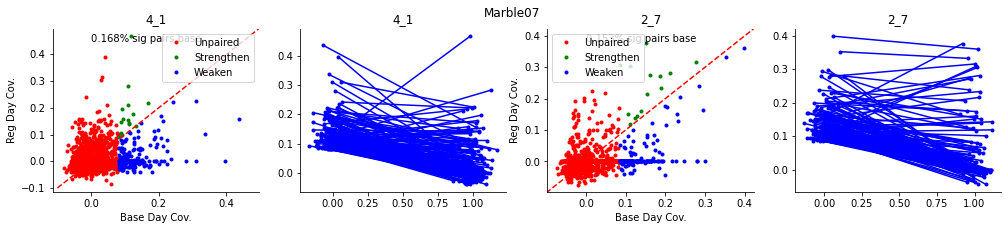

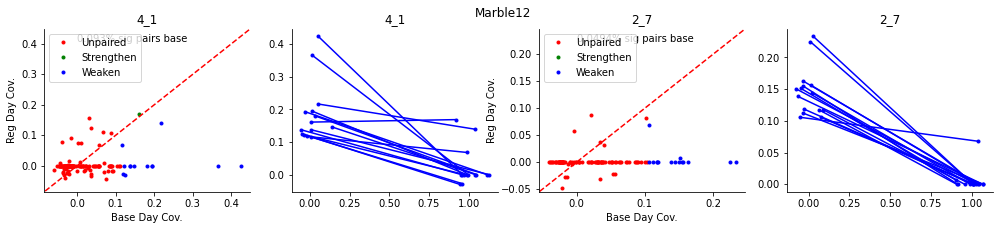

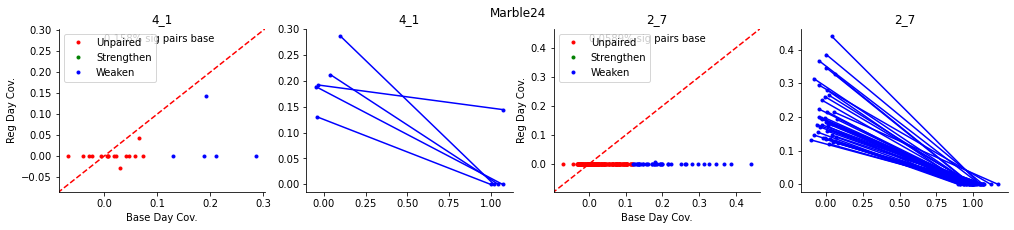

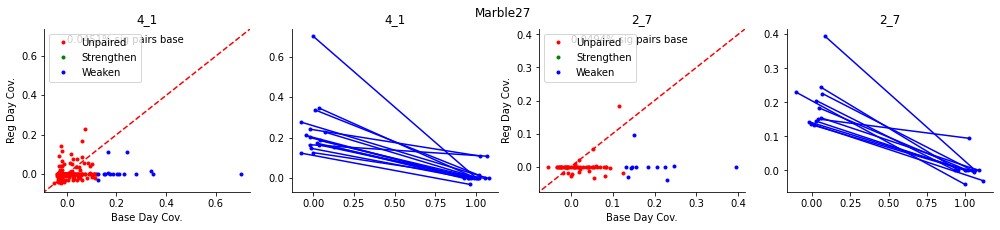

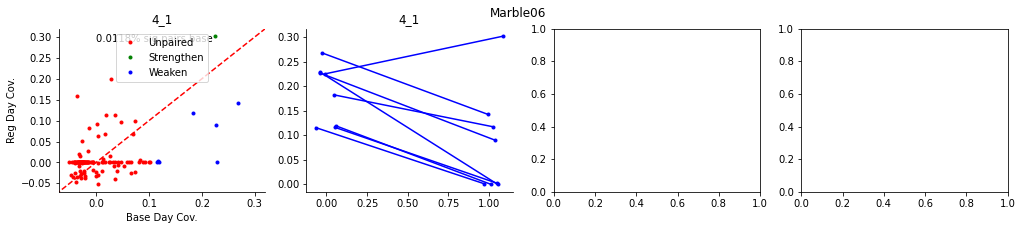

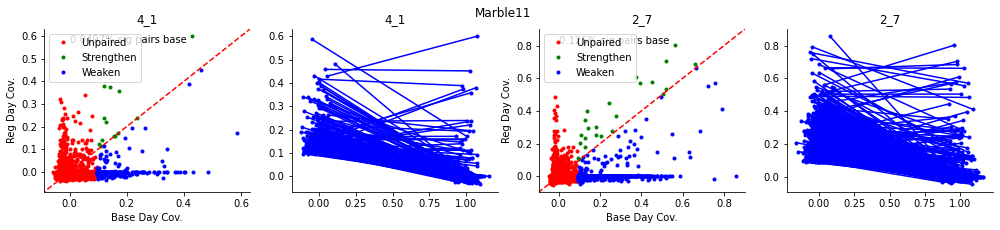

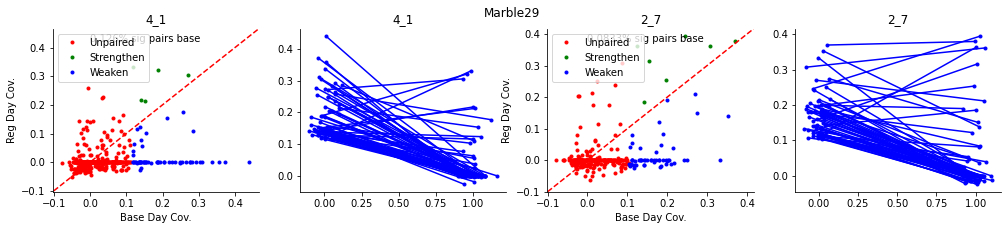

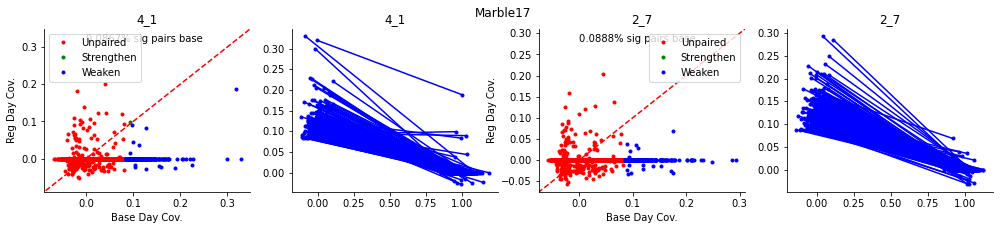

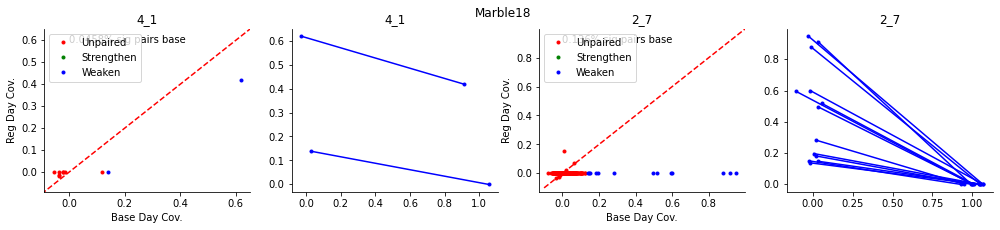

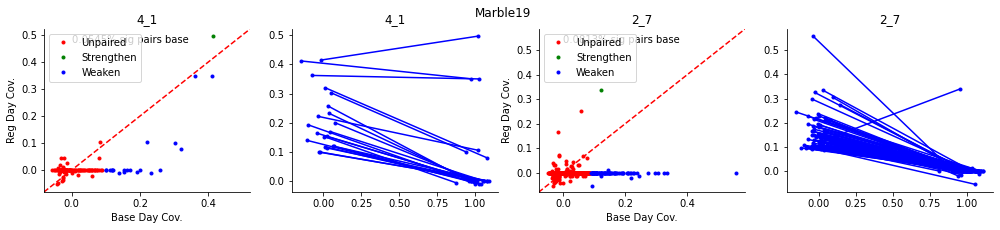

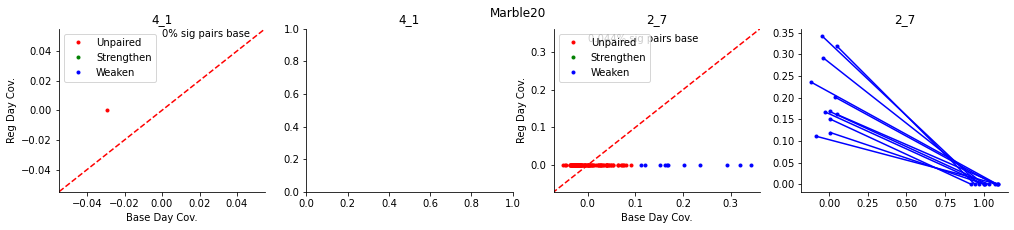

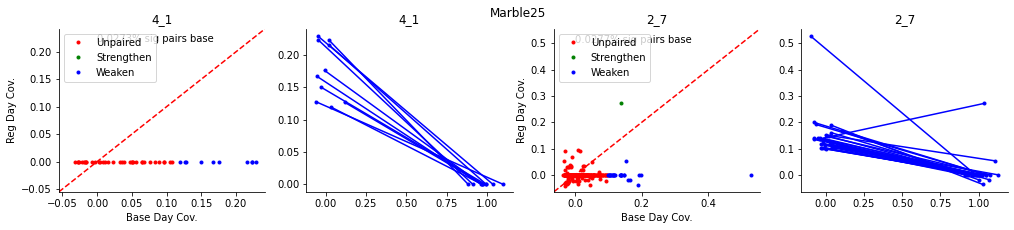

In [262]:
dict_use = freeze_silent_cov
pairs_plot = ['4_1', '2_7']
include_silent = True
sig_pairs_plot = 'base'  # 'base' or 'reg' or 'either'
for group_name in dict_use.keys():
    group_dict = dict_use[group_name]
    for mouse_name in group_dict.keys():
        mouse_dict = group_dict[mouse_name]
        fig, axp = plt.subplots(1, 4, figsize=(17, 3))
        fig.suptitle(mouse_name)
        for idd, d1_d2 in enumerate(pairs_plot):
            try:
                full_mat_use = cov_dict_full[group_name][mouse_name][d1_d2]
                mat_use = dict_use[group_name][mouse_name][d1_d2]

                tril_indices = np.tril_indices_from(full_mat_use, -1)
                npairs_full = len(tril_indices[0])
                sig_thresh = 2 * np.std(full_mat_use[tril_indices[0], tril_indices[1]])
                _ = fa.scatter_cov_across_days(mat_use, label_by_state=True, sig_thresh=sig_thresh, 
                                               ax=axp[0 + 2 * idd], include_silent=include_silent)
                axp[0 + 2 * idd].set_title(d1_d2)

                base_cov, reg_cov = fa.get_cov_pairs_from_mat(mat_use, None, include_silent=include_silent)
                jitter = 0.05
                if sig_pairs_plot == 'either':
                    thresh_bool = np.bitwise_or(base_cov > sig_thresh, reg_cov > sig_thresh)
                elif sig_pairs_plot == 'base':
                    thresh_bool = base_cov > sig_thresh
                elif sig_pairs_plot == 'reg':
                    thresh_bool = reg_cov > sig_thresh
                nsigpairs = np.sum(thresh_bool)
                axp[0 + 2 * idd].text(0, axp[0 + 2 * idd].get_ylim()[1]*0.9, 
                                      f'{nsigpairs/npairs_full*100:0.3g}% sig pairs {sig_pairs_plot}')

                for base, reg in zip(base_cov[thresh_bool], reg_cov[thresh_bool]):
                    axp[1 + 2 * idd].plot([np.random.randn(1)*jitter, np.random.randn(1)*jitter + 1], 
                               [base, reg], 'b.-')
                axp[1 + 2 * idd].set_title(d1_d2)

                sns.despine(ax=axp[1 + 2* idd])
            except KeyError:
                pass
            

In [210]:
group_code = []
group_code.append('ANI') if group_name == 'ANI' else group_code.append('Ctrl')
group_code.append('ANI')
group_code

['ANI', 'ANI']

In [251]:
dict_use = freeze_silent_cov
pairs_plot = ['-2_-1', '-1_4', '4_1', '1_2', '2_7']
sig_pairs_plot = 'base'  # 'base' or 'reg' or 'either'

day_code, group_code, sigpctfull, sigpctfreeze = [], [], [], [] # pre-allocate for plotting!
for group_name in dict_use.keys():
    group_dict = dict_use[group_name]
    for mouse_name in group_dict.keys():
        mouse_dict = group_dict[mouse_name]
        for idd, d1_d2 in enumerate(pairs_plot):
            try:
                full_mat_use = cov_dict_full[group_name][mouse_name][d1_d2]
                mat_use = dict_use[group_name][mouse_name][d1_d2]

                tril_indices = np.tril_indices_from(full_mat_use, -1)
                tril_indices_freeze = np.tril_indices_from(mat_use, -1)
                npairs_full = len(tril_indices[0])
                npairs_freeze = len(tril_indices_freeze[0])
                sig_thresh = 2 * np.std(full_mat_use[tril_indices[0], tril_indices[1]])
                base_cov, reg_cov = fa.get_cov_pairs_from_mat(mat_use, None, include_silent=True)
                if sig_pairs_plot == 'either':
                    thresh_bool = np.bitwise_or(base_cov > sig_thresh, reg_cov > sig_thresh)
                elif sig_pairs_plot == 'base':
                    thresh_bool = base_cov > sig_thresh
                elif sig_pairs_plot == 'reg':
                    thresh_bool = reg_cov > sig_thresh
                nsigpairs = np.sum(thresh_bool)

                # Build up lists for dumping into dataframe
                group_code.append('ANI') if group_name == 'ANI' else group_code.append('Ctrl')
                day_code.append(d1_d2)
                sigpctfull.append(nsigpairs/npairs_full*100)
                sigpctfreeze.append(nsigpairs/npairs_freeze*100)
            except KeyError:
                pass

sigpairs_df = pd.DataFrame(data={'d1_d2' : day_code, 'Group': group_code, 'SigPctFull': sigpctfull, 
                                'SigPctFreeze': sigpctfreeze})                       

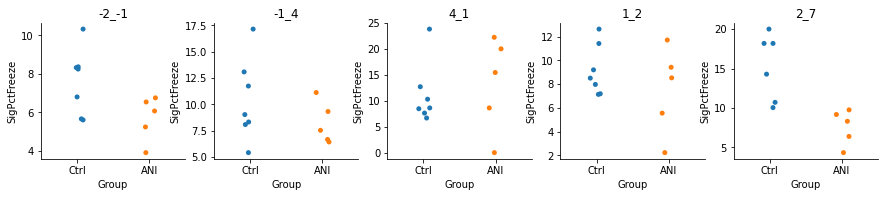

In [252]:
fig, ax = plt.subplots(1, len(pairs_plot), figsize=(3*len(pairs_plot), 2.5))
for a, d1_d2 in zip(ax, pairs_plot):
    sns.stripplot(x='Group', y='SigPctFreeze', data=sigpairs_df[sigpairs_df['d1_d2'] == d1_d2], ax=a)
    sns.despine(ax=a)
    a.set_title(d1_d2)

In [259]:
from scipy.stats import ttest_ind
daypair = '2_7'
grp1 = sigpairs_df.loc[(sigpairs_df['Group'] == 'Ctrl') & (sigpairs_df['d1_d2'] == daypair)]['SigPctFreeze']
grp2 = sigpairs_df.loc[(sigpairs_df['Group'] == 'ANI') & (sigpairs_df['d1_d2'] == daypair)]['SigPctFreeze']
stat, pval = ttest_ind(grp1, grp2)
pval

0.005389245946316338

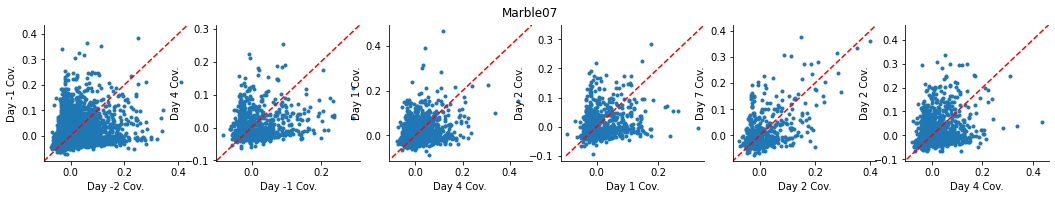

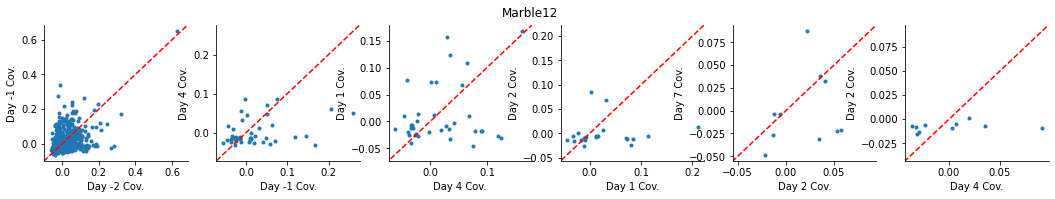

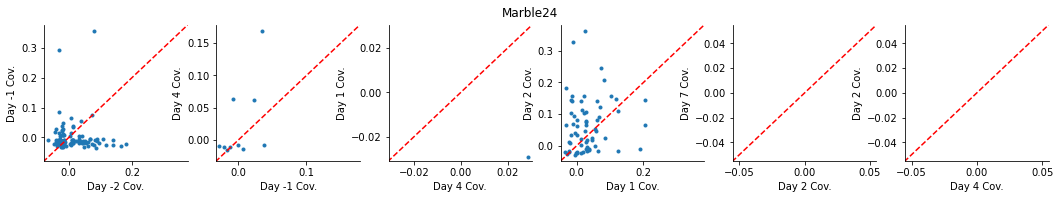

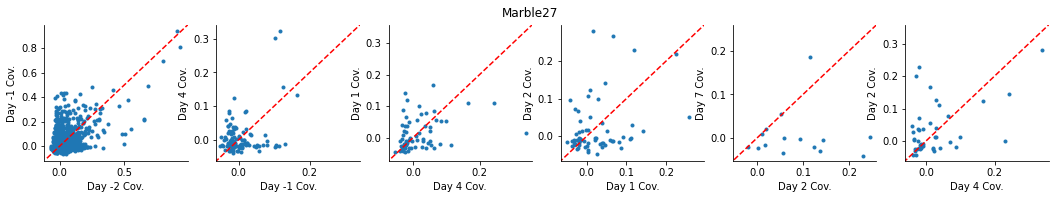

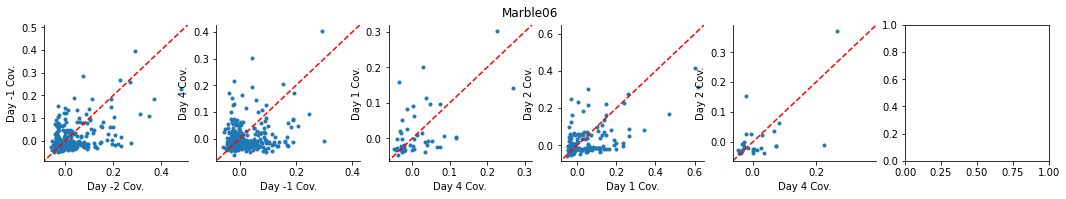

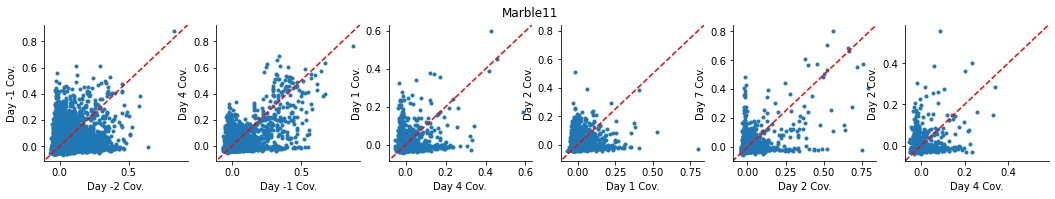

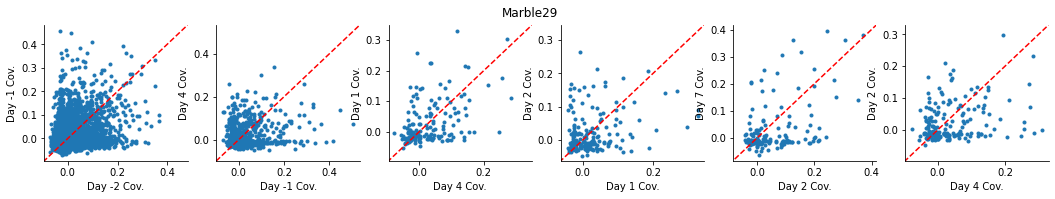

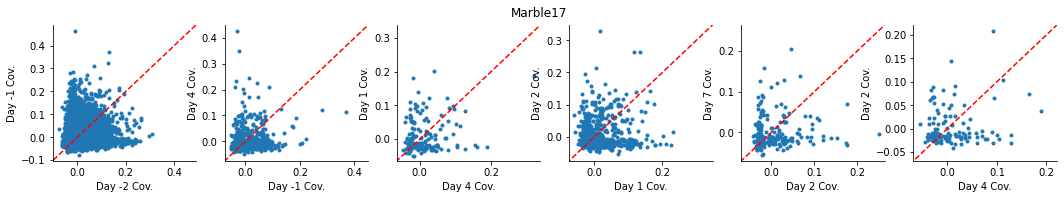

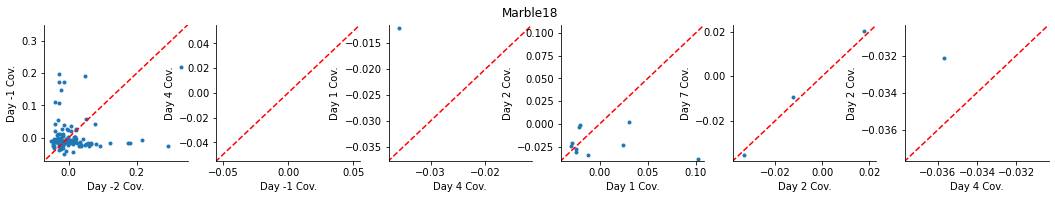

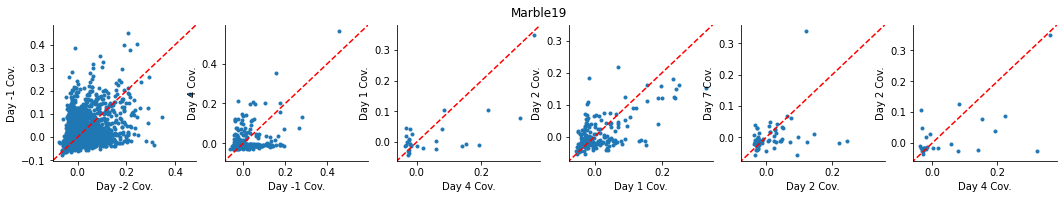

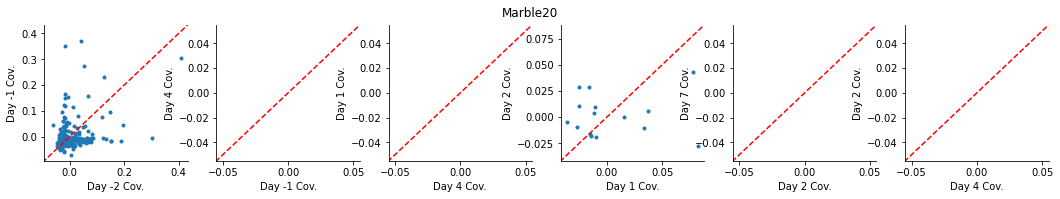

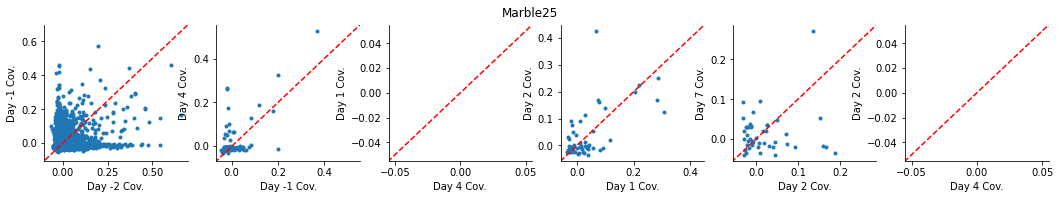

In [119]:
freeze_silent_cov = np.load(os.path.join(save_dir, 'freeze_cells_cov_across_days_w_silent.npy'),
                           allow_pickle=True).item()
ndays = 6

plot_pw_cov_across_days(freeze_silent_cov, 6, False)

ANI mice appear to have almost no cells strengthening their freeze related tuning from hr 4 to day 1, despite having a lot of cells that do continue to fire together from day -1 to hr 4. Quantify by counting up # of strengthened (above diagonal) vs # weakened (below diagonal) cells.  Must have cov > 2sd of mean of whole matrix to be considered a candidate pair....  Work with percentages.  Can also plot # of cells across days and show paired with lines connecting (would have to compare to day -2/-1 baseline...)

Do for other days too to show that things don't change as much.

## Other random plots below here

Calculating Dupret activations from raw calcium activity
calculating significant tuning for nperm=1000
Grabbing pre-calculated Dupret activations for raw data
Grabbing pre-calculated Dupret activations for raw data
generating permuted rasters - may take up to 1 minute
Calculating Dupret activations from raw calcium activity


array([[<AxesSubplot:title={'center':'PCA 0'}, ylabel='freeze starts #'>,
        <AxesSubplot:title={'center':'PCA 1'}>,
        <AxesSubplot:title={'center':'PCA 2'}>,
        <AxesSubplot:title={'center':'PCA 3'}>,
        <AxesSubplot:title={'center':'PCA 4'}>],
       [<AxesSubplot:title={'center':'PCA 5'}, ylabel='freeze starts #'>,
        <AxesSubplot:title={'center':'PCA 6'}>,
        <AxesSubplot:title={'center':'PCA 7'}>,
        <AxesSubplot:title={'center':'PCA 8'}>,
        <AxesSubplot:title={'center':'PCA 9'}>],
       [<AxesSubplot:title={'center':'PCA 10'}, ylabel='freeze starts #'>,
        <AxesSubplot:title={'center':'PCA 11'}>,
        <AxesSubplot:title={'center':'PCA 12'}>,
        <AxesSubplot:title={'center':'PCA 13'}>,
        <AxesSubplot:title={'center':'PCA 14'}>],
       [<AxesSubplot:title={'center':'PCA 15'}, ylabel='freeze starts #'>,
        <AxesSubplot:title={'center':'PCA 16'}>,
        <AxesSubplot:title={'center':'PCA 17'}>,
        <AxesSubplot:

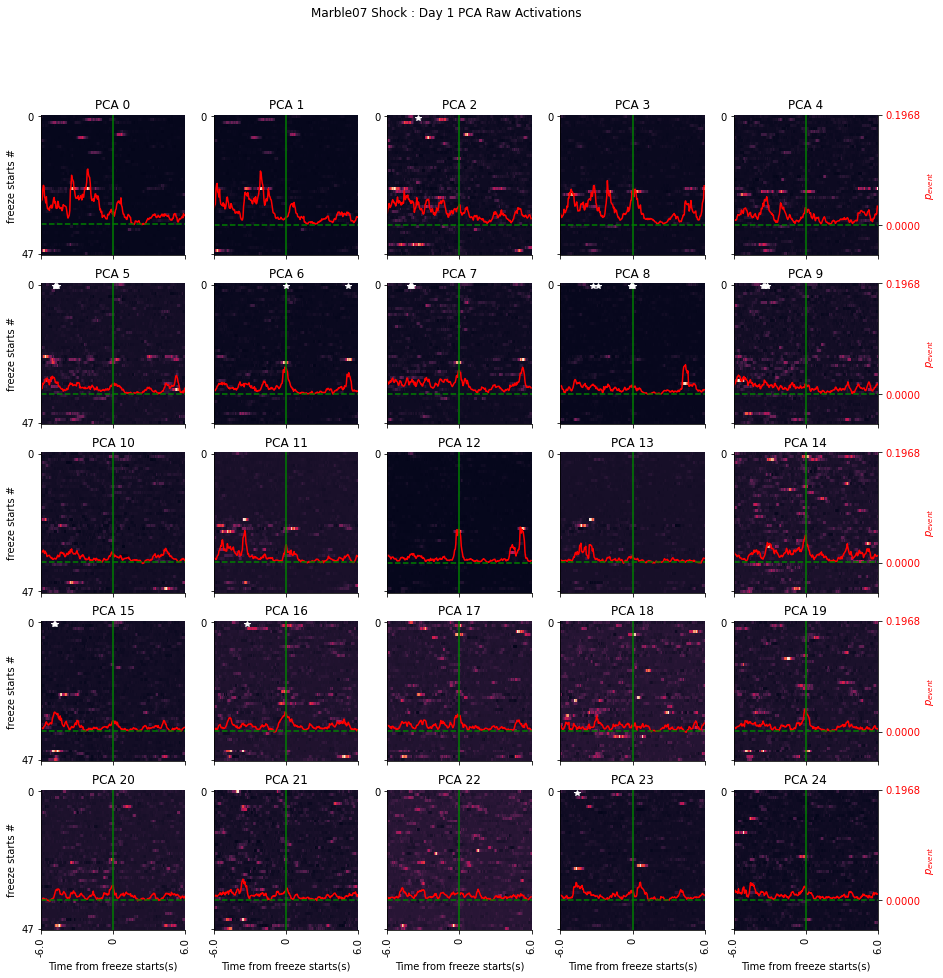

In [8]:
DR = fa.DimReduction('Marble07', 'Shock', 1)
DR.get_tuning_sig('freeze_onset', 6, nperm=1000, dr_type='pca')
DR.plot_rasters(dr_type='pca')

Calculating Dupret activations from raw calcium activity
Calculating Dupret activations from raw calcium activity


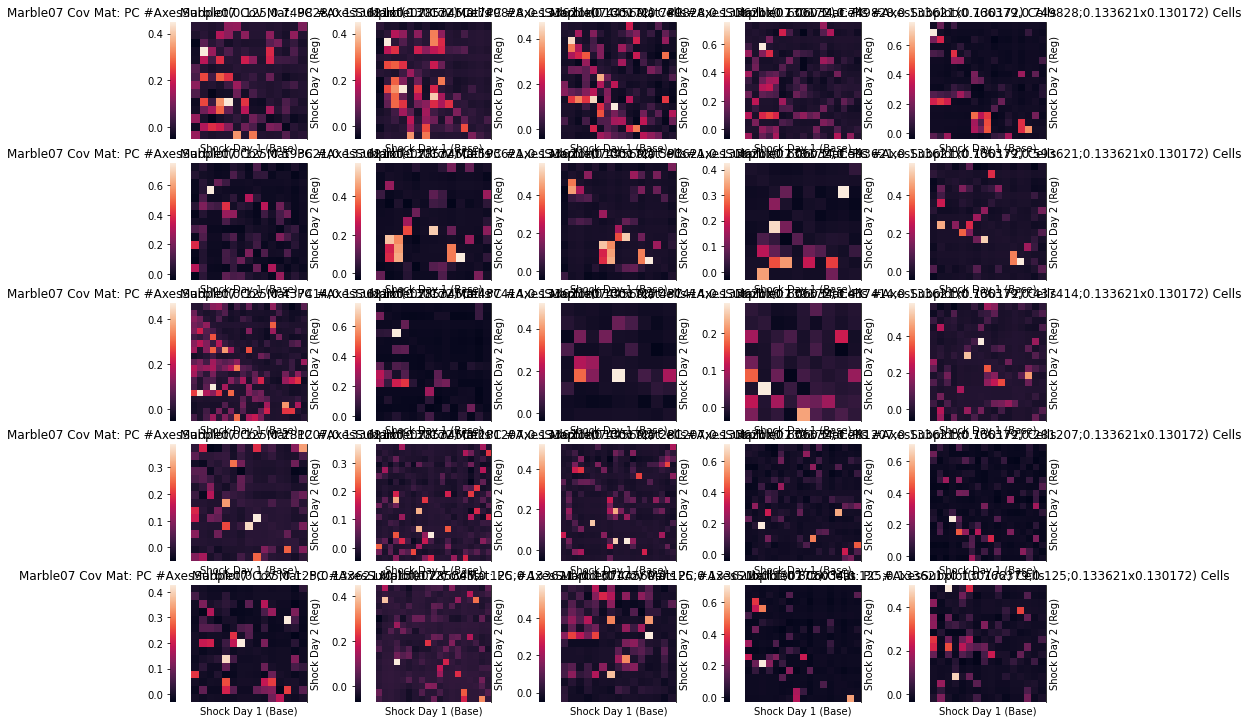

In [14]:
# Plot All PCs across days for one mouse
plot_dir = '/Users/nkinsky/Documents/BU/Working/Eraser/plots'
group_plot = [err.learners, err.nonlearners, err.ani_mice_good]
group_names = ['Learners', 'Non-learners', 'ANI']
mouse = 'Marble07'
d1 = 1
d2 = 2
DRreg = fa.DimReductionReg(mouse, 'Shock', d1, 'Shock', d2, random_state=1)
ncols = 5
nrows = np.ceil(DRreg.DRbase.nA/ncols).astype(int)
fig, ax = plt.subplots(nrows , ncols, figsize=(3.2*ncols, 2.5*nrows))
fig.suptitle(mouse + " PC Cov. Mat across days")
for ida, a in enumerate(ax.reshape(-1)):
    sig_wts = np.where(DRreg.DRbase.pca.df[ida].abs() > DRreg.DRbase.pca.df[ida].std()*2)[0]
    DRreg.plot_cov_across_days(neurons=sig_wts, label='PC #' + str(ida), ax=a)
    a.set_title('PC # ' + str(ida))
